# CAPSTONE PROJECT 
## PROJECT TITLE : TELECOM CUSTMER CHURN ANALYSIS

### DOMAIN OF PROJECT : CONSUMER ANALYTICS

In [2]:
# Importing Libararies
# Retrieving data
# Understand nature of the data using .info() , .describe()
# Taking avg of similar columns 
# Droping off extra columns
# Univariate Analysis & Multivariate Analysis
  # Boxplots
  # Pair Plot
  # correlation
  # Heatmap
# Value Counts 
# Data Pre-Processing
  #Handling Null Values, Null Value Imputation
  #Treating Outliers
# Scaling dataset 
# Model Building(UNSUPERVISED MACHINE LEARNING)
  # PCA
  # DBSCAN Clustering
# Concluion

# IMPORTING LIBARIRES

In [2]:
import warnings 
warnings.filterwarnings('ignore') 
import pandas as pd  
import numpy as np 

import matplotlib.pyplot as plt 
import seaborn as sns 

from scipy import stats as t

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import statsmodels.api as sm

In [3]:
# # pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.width', None)
# pd.set_option('display.max_colwidth', -1)

# Column name and information about each column
#### Dataset contains customer-level information for a span of four consecutive months - June, July, August and September. The months are encoded as 6, 7, 8 and 9, respectively.

In [4]:
dictonary = pd.read_excel('C:/Users/Tublu/Capstone project/telecom churn analysis/DataDictionary-TelecomChurn.xlsx')
dictonary

Acronyms                                           Descriptions
0   MOBILE_NUMBER                              Customer phone number
1       CIRCLE_ID  Telecom circle area to which the customer belo...
2             LOC           Local calls - within same telecom circle
3             STD             STD calls - outside the calling circle
4              IC                                     Incoming calls
5              OG                                     Outgoing calls
6             T2T  Operator T to T, i.e. within same operator (mo...
7         T2M                    Operator T to other operator mobile
8         T2O                Operator T to other operator fixed line
9         T2F                         Operator T to fixed lines of T
10        T2C                     Operator T to it’s own call center
11       ARPU                               Average revenue per user
12        MOU                         Minutes of usage - voice calls
13        AON      Age on network - number of days the customer i...
14       ONNET     All kind of calls within the same operator net...
15     OFFNET       All kind of calls outside the operator T network
16           ROAM  Indicates that customer is in roaming zone dur...
17         SPL                                         Special calls
18        ISD                                              ISD calls
19       RECH                                               Recharge
20        NUM                                                 Number
21        AMT                               Amount in local currency
22        MAX                                                Maximum
23       DATA                                        Mobile internet
24         3G                                             3G network
25         AV                                                Average
26        VOL                   Mobile internet usage volume (in MB)
27         2G                                             2G network
28        PCK                 Prepaid service schemes called - PACKS
29      NIGHT         Scheme to use during specific night hours only
30    MONTHLY      Service schemes with validity equivalent to a ...
31      SACHET     Service schemes with validity smaller than a m...
32        *.6                              KPI for the month of June
33        *.7                              KPI for the month of July
34        *.8                            KPI for the month of August
35        *.9                         KPI for the month of September
36        FB_USER  Service scheme to avail services of Facebook a...
37        VBC      Volume based cost - when no specific scheme is...

# RETRIEVING THE DATASET

In [5]:
data= pd.read_csv("C:/Users/Tublu/Capstone project/telecom churn analysis/telecom_churn_data.csv")
data.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6  ...  sachet_3g_9  fb_user_6  fb_user_7  \
0            9/30/2014  197.385  ...            0        1.0        1.0   
1            9/30/2014   34.047  ...            0        NaN        1.0   
2            9/30/2014  167.690  ...            0        NaN        NaN   
3            9/30/2014  221.338  ...            0        NaN        NaN   
4            9/30/2014  261.636  ...            0        0.0        NaN   

   fb_user_8  fb_user_9   aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  sep_vbc_3g  
0        1.0        NaN   968        30.4         0.0      101.20        3.58  
1        1.0        NaN  1006         0.0         0.0        0.00        0.00  
2        NaN        1.0  1103         0.0         0.0        4.17        0.00  
3        NaN        NaN  2491         0.0         0.0        0.00        0.00  
4        NaN        NaN  1526         0.0         0.0        0.00        0.00  

[5 rows x 226 columns]

# UNDERSTANDING THE NATURE OF DATA

In [6]:
data.info() # Understand nature of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [7]:
data.shape # Understand nature of the data

(99999, 226)

In [8]:
data.describe() # Understand nature of the data

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         98981.0         98981.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         98981.0  99999.000000  99999.000000  99999.000000  99999.000000   
mean              0.0    282.987358    278.536648    279.154731    261.645069   
std               0.0    328.439770    338.156291    344.474791    341.998630   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%               0.0     93.411500     86.980500     84.126000     62.685000   
50%               0.0    197.704000    191.640000    192.080000    176.849000   
75%               0.0    371.060000    365.344500    369.370500    353.466500   
max               0.0  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6  ...   sachet_3g_9     fb_user_6     fb_user_7  \
count  96062.000000  ...  99999.000000  25153.000000  25571.000000   
mean     132.395875  ...      0.084581      0.914404      0.908764   
std      297.207406  ...      0.650457      0.279772      0.287950   
min        0.000000  ...      0.000000      0.000000      0.000000   
25%        7.380000  ...      0.000000      1.000000      1.000000   
50%       34.310000  ...      0.000000      1.000000      1.000000   
75%      118.740000  ...      0.000000      1.000000      1.000000   
max     7376.710000  ...     49.000000      1.000000      1.000000   

          fb_user_8     fb_user_9           aon    aug_vbc_3g    jul_vbc_3g  \
count  26339.000000  25922.000000  99999.000000  99999.000000  99999.000000   
mean       0.890808      0.860968   1219.854749     68.170248     66.839062   
std        0.311885      0.345987    954.733842    267.580450    271.201856   
min        0.000000      0.000000    180.000000      0.000000      0.000000   
25%        1.000000      1.000000    467.000000      0.000000      0.000000   
50%        1.000000      1.000000    863.000000      0.000000      0.000000   
75%        1.000000      1.000000   1807.500000      0.000000      0.000000   
max        1.000000      1.000000   4337.000000  12916.220000   9165.600000   

         jun_vbc_3g    sep_vbc_3g  
count  99999.000000  99999.000000  
mean      60.021204      3.299373  
std      253.938223     32.408353  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        0.000000      0.000000  
max    11166.210000   2618.570000  

[8 rows x 214 columns]

In [9]:
data.dtypes # Understand nature of the data

mobile_number       int64
circle_id           int64
loc_og_t2o_mou    float64
std_og_t2o_mou    float64
loc_ic_t2o_mou    float64
                   ...   
aon                 int64
aug_vbc_3g        float64
jul_vbc_3g        float64
jun_vbc_3g        float64
sep_vbc_3g        float64
Length: 226, dtype: object

In [10]:
total_columns = list(data.columns) # making list of columns to get exact hand on columns 
total_columns

['mobile_number',
 'circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'arpu_9',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 's

# SPLITING COLUMNS 

In [11]:
a = data.columns[0:45]
a


Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6', 'arpu_7',
       'arpu_8', 'arpu_9', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8',
       'onnet_mou_9', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'offnet_mou_9', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8',
       'roam_ic_mou_9', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
       'roam_og_mou_9', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7',
       'loc_og_t2t_mou_8', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_6',
       'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2m_mou_9',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
       'loc_og_t2f_mou_9', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7',
       'loc_og_t2c_mou_8', 'loc_og_t2c_mou_9'],
      dtype='object')

In [12]:
b = data.columns[45:89]
b

Index(['loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'loc_og_mou_9',
       'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8',
       'std_og_t2t_mou_9', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7',
       'std_og_t2m_mou_8', 'std_og_t2m_mou_9', 'std_og_t2f_mou_6',
       'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2f_mou_9',
       'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
       'std_og_t2c_mou_9', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8',
       'std_og_mou_9', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8',
       'isd_og_mou_9', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8',
       'spl_og_mou_9', 'og_others_6', 'og_others_7', 'og_others_8',
       'og_others_9', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8',
       'total_og_mou_9', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7',
       'loc_ic_t2t_mou_8', 'loc_ic_t2t_mou_9'],
      dtype='object')

In [13]:
c = data.columns[89:133]
c

Index(['loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8',
       'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7',
       'loc_ic_t2f_mou_8', 'loc_ic_t2f_mou_9', 'loc_ic_mou_6', 'loc_ic_mou_7',
       'loc_ic_mou_8', 'loc_ic_mou_9', 'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7',
       'std_ic_t2t_mou_8', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_6',
       'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8', 'std_ic_t2m_mou_9',
       'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8',
       'std_ic_t2f_mou_9', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7',
       'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9', 'std_ic_mou_6', 'std_ic_mou_7',
       'std_ic_mou_8', 'std_ic_mou_9', 'total_ic_mou_6', 'total_ic_mou_7',
       'total_ic_mou_8', 'total_ic_mou_9', 'spl_ic_mou_6', 'spl_ic_mou_7',
       'spl_ic_mou_8', 'spl_ic_mou_9', 'isd_ic_mou_6', 'isd_ic_mou_7',
       'isd_ic_mou_8', 'isd_ic_mou_9'],
      dtype='object')

In [14]:
d = data.columns[133:181]
d


Index(['ic_others_6', 'ic_others_7', 'ic_others_8', 'ic_others_9',
       'total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8',
       'total_rech_num_9', 'total_rech_amt_6', 'total_rech_amt_7',
       'total_rech_amt_8', 'total_rech_amt_9', 'max_rech_amt_6',
       'max_rech_amt_7', 'max_rech_amt_8', 'max_rech_amt_9',
       'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_9', 'last_day_rch_amt_6', 'last_day_rch_amt_7',
       'last_day_rch_amt_8', 'last_day_rch_amt_9', 'date_of_last_rech_data_6',
       'date_of_last_rech_data_7', 'date_of_last_rech_data_8',
       'date_of_last_rech_data_9', 'total_rech_data_6', 'total_rech_data_7',
       'total_rech_data_8', 'total_rech_data_9', 'max_rech_data_6',
       'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
       'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8',
       'count_rech_2g_9', 'count_rech_3g_6', 'count_rech_3g_7',
       'count_rech_3g_8', 'count_rech_3g_9',

In [15]:
e = data.columns[181 : 226]
e

Index(['vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8', 'vol_2g_mb_9',
       'vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8', 'vol_3g_mb_9', 'arpu_3g_6',
       'arpu_3g_7', 'arpu_3g_8', 'arpu_3g_9', 'arpu_2g_6', 'arpu_2g_7',
       'arpu_2g_8', 'arpu_2g_9', 'night_pck_user_6', 'night_pck_user_7',
       'night_pck_user_8', 'night_pck_user_9', 'monthly_2g_6', 'monthly_2g_7',
       'monthly_2g_8', 'monthly_2g_9', 'sachet_2g_6', 'sachet_2g_7',
       'sachet_2g_8', 'sachet_2g_9', 'monthly_3g_6', 'monthly_3g_7',
       'monthly_3g_8', 'monthly_3g_9', 'sachet_3g_6', 'sachet_3g_7',
       'sachet_3g_8', 'sachet_3g_9', 'fb_user_6', 'fb_user_7', 'fb_user_8',
       'fb_user_9', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g',
       'sep_vbc_3g'],
      dtype='object')

# TAKING AVERAGE OF SIMILAR COLUMNS 

In [16]:
data['last_date_of_month'] = data[['last_date_of_month_6', 'last_date_of_month_7','last_date_of_month_8', 'last_date_of_month_9']].mean(axis=1)
data['arpu'] = data[['arpu_6', 'arpu_7','arpu_8', 'arpu_9']].mean(axis=1)
data['onnet_mou'] = data[['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8','onnet_mou_9']].mean(axis=1)
data['offnet_mou'] = data[['offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8','offnet_mou_9']].mean(axis=1)
data['roam_ic_mou'] = data[['roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8','roam_ic_mou_9']].mean(axis=1)
data['roam_og_mou'] = data[['roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8','roam_og_mou_9']].mean(axis=1)
data['loc_og_t2t_mou'] = data[['loc_og_t2t_mou_6', 'loc_og_t2t_mou_7','loc_og_t2t_mou_8', 'loc_og_t2t_mou_9']].mean(axis=1)
data['loc_og_t2m_mou'] = data[['loc_og_t2m_mou_6','loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2m_mou_9']].mean(axis=1)
data['loc_og_t2f_mou'] = data[['loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8','loc_og_t2f_mou_9']].mean(axis=1)
data['loc_og_t2c_mou'] = data[['loc_og_t2c_mou_6', 'loc_og_t2c_mou_7','loc_og_t2c_mou_8', 'loc_og_t2c_mou_9']].mean(axis=1)



In [17]:
data['loc_og_mou'] = data[['loc_og_mou_6','loc_og_mou_7','loc_og_mou_8','loc_og_mou_9']].mean(axis = 1)
data['std_og_t2t_mou'] = data[['std_og_t2t_mou_6','std_og_t2t_mou_7','std_og_t2t_mou_8','std_og_t2t_mou_9']].mean(axis = 1)
data['std_og_t2m_mou'] = data[['std_og_t2m_mou_6','std_og_t2m_mou_7','std_og_t2m_mou_8','std_og_t2m_mou_9']].mean(axis = 1)
data['std_og_t2f_mou'] = data[['std_og_t2f_mou_6','std_og_t2f_mou_7','std_og_t2f_mou_8','std_og_t2f_mou_9']].mean(axis = 1)
data['std_og_t2c_mou'] = data[['std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_t2c_mou_8','std_og_t2c_mou_9']].mean(axis = 1)
data['std_og_mou'] = data[['std_og_mou_6','std_og_mou_7','std_og_mou_8','std_og_mou_9']].mean(axis = 1)
data['isd_og_mou'] = data[['isd_og_mou_6','isd_og_mou_7','isd_og_mou_8','isd_og_mou_9']].mean(axis = 1)
data['spl_og_mou'] = data[['spl_og_mou_6','spl_og_mou_7','spl_og_mou_8','spl_og_mou_9']].mean(axis = 1)
data['og_others'] = data[['og_others_6','og_others_7','og_others_8','og_others_9']].mean(axis = 1)
data['total_og_mou'] = data[['total_og_mou_6','total_og_mou_7','total_og_mou_8','total_og_mou_9']].mean(axis = 1)
data['loc_ic_t2t_mou'] = data[['loc_ic_t2t_mou_6','loc_ic_t2t_mou_7','loc_ic_t2t_mou_8','loc_ic_t2t_mou_9']].mean(axis = 1)


In [18]:
data['loc_ic_t2m_mou'] = data[['loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8','loc_ic_t2m_mou_9']].mean(axis=1)
data['loc_ic_t2f_mou'] = data[['loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7','loc_ic_t2f_mou_8', 'loc_ic_t2f_mou_9']].mean(axis=1)
data['loc_ic_t2f_mou'] = data[['loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7','loc_ic_t2f_mou_8', 'loc_ic_t2f_mou_9']].mean(axis=1)
data['loc_ic_mou'] = data[['loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', 'loc_ic_mou_9']].mean(axis=1)
data['std_ic_t2t_mou'] = data[['std_ic_t2t_mou_6', 'std_ic_t2t_mou_7','std_ic_t2t_mou_8', 'std_ic_t2t_mou_9']].mean(axis=1)
data['std_ic_t2m_mou'] = data[['std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8', 'std_ic_t2m_mou_9']].mean(axis=1)
data['ic_t2f_mou'] = data[['std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8','std_ic_t2f_mou_9']].mean(axis=1)
data['std_ic_t2o_mou'] = data[['std_ic_t2o_mou_6', 'std_ic_t2o_mou_7','std_ic_t2o_mou_8', 'std_ic_t2o_mou_9']].mean(axis=1)
data['std_ic_mou'] = data[['std_ic_mou_6', 'std_ic_mou_7','std_ic_mou_8', 'std_ic_mou_9']].mean(axis=1)
data['total_ic_mou'] = data[['total_ic_mou_6', 'total_ic_mou_7','total_ic_mou_8', 'total_ic_mou_9']].mean(axis=1)
data['spl_ic_mou'] = data[['spl_ic_mou_6', 'spl_ic_mou_7','spl_ic_mou_8', 'spl_ic_mou_9']].mean(axis=1)
data['isd_ic_mou'] = data[['isd_ic_mou_6', 'isd_ic_mou_7','isd_ic_mou_8', 'isd_ic_mou_9']].mean(axis=1)




In [19]:
data['ic_others'] = data[['ic_others_6', 'ic_others_7', 'ic_others_8', 'ic_others_9']].mean(axis = 1)
data['total_rech_num'] = data[['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8','total_rech_num_9']].mean(axis = 1)
data['total_rech_amt'] = data[['total_rech_amt_6', 'total_rech_amt_7','total_rech_amt_8', 'total_rech_amt_9']].mean(axis = 1)
data['max_rech_amt'] = data[['max_rech_amt_6','max_rech_amt_7', 'max_rech_amt_8', 'max_rech_amt_9']].mean(axis = 1)
data['last_day_rch_amt'] = data[['last_day_rch_amt_6', 'last_day_rch_amt_7','last_day_rch_amt_8', 'last_day_rch_amt_9']].mean(axis = 1)
data['total_rech_data'] = data[['total_rech_data_6', 'total_rech_data_7','total_rech_data_8', 'total_rech_data_9']].mean(axis = 1)
data['max_rech_data'] = data[['max_rech_data_6','max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9']].mean(axis = 1)
data['count_rech_2g'] = data[['count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8','count_rech_2g_9']].mean(axis = 1)
data['count_rech_3g'] = data[['count_rech_3g_6', 'count_rech_3g_7','count_rech_3g_8', 'count_rech_3g_9']].mean(axis = 1)
data['av_rech_amt_data'] = data[['av_rech_amt_data_6','av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9']].mean(axis = 1)


In [20]:
data['vol_2g_mb'] = data[['vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8', 'vol_2g_mb_9']].mean(axis = 1)
data['vol_3g_mb'] = data[['vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8', 'vol_3g_mb_9']].mean(axis = 1)
data['arpu_3g_'] = data[['arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_3g_9']].mean(axis = 1)
data['arpu_2g_'] = data[['arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'arpu_2g_9']].mean(axis = 1)
data['night_pck_user'] = data[['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'night_pck_user_9']].mean(axis = 1)
data['monthly_2g'] = data[['monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'monthly_2g_9']].mean(axis = 1)
data['sachet_2g'] = data[['sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 'sachet_2g_9']].mean(axis = 1)
data['monthly_3g'] = data[['monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'monthly_3g_9']].mean(axis = 1)
data['sachet_3g'] = data[['sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 'sachet_3g_9']].mean(axis = 1)
data['fb_user'] = data[['fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9']].mean(axis = 1)
data['vbc_3g'] = data[['aug_vbc_3g', 'jun_vbc_3g', 'jul_vbc_3g', 'sep_vbc_3g']].mean(axis = 1)


# DROPING ALL THE SIMILAR COLUMNS 


In [21]:
data.drop(columns = ['last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6', 'arpu_7',
       'arpu_8', 'arpu_9', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8',
       'onnet_mou_9', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'offnet_mou_9', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8',
       'roam_ic_mou_9', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
       'roam_og_mou_9', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7',
       'loc_og_t2t_mou_8', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_6',
       'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2m_mou_9',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
       'loc_og_t2f_mou_9', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7',
       'loc_og_t2c_mou_8', 'loc_og_t2c_mou_9' ], inplace = True)

In [22]:
data.drop(columns = ['loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'loc_og_mou_9',
       'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8',
       'std_og_t2t_mou_9', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7',
       'std_og_t2m_mou_8', 'std_og_t2m_mou_9', 'std_og_t2f_mou_6',
       'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2f_mou_9',
       'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
       'std_og_t2c_mou_9', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8',
       'std_og_mou_9', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8',
       'isd_og_mou_9', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8',
       'spl_og_mou_9', 'og_others_6', 'og_others_7', 'og_others_8',
       'og_others_9', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8',
       'total_og_mou_9', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7',
       'loc_ic_t2t_mou_8', 'loc_ic_t2t_mou_9' ], inplace = True)

In [23]:
data.drop(columns = ['loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8',
       'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7',
       'loc_ic_t2f_mou_8', 'loc_ic_t2f_mou_9', 'loc_ic_mou_6', 'loc_ic_mou_7',
       'loc_ic_mou_8', 'loc_ic_mou_9', 'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7',
       'std_ic_t2t_mou_8', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_6',
       'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8', 'std_ic_t2m_mou_9',
       'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8',
       'std_ic_t2f_mou_9', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7',
       'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9', 'std_ic_mou_6', 'std_ic_mou_7',
       'std_ic_mou_8', 'std_ic_mou_9', 'total_ic_mou_6', 'total_ic_mou_7',
       'total_ic_mou_8', 'total_ic_mou_9', 'spl_ic_mou_6', 'spl_ic_mou_7',
       'spl_ic_mou_8', 'spl_ic_mou_9', 'isd_ic_mou_6', 'isd_ic_mou_7',
       'isd_ic_mou_8', 'isd_ic_mou_9', 'ic_others_6', 'ic_others_7',
       'ic_others_8', 'ic_others_9', 'circle_id' ], inplace = True)

In [24]:
data.drop(columns =['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8',
       'total_rech_num_9', 'total_rech_amt_6', 'total_rech_amt_7',
       'total_rech_amt_8', 'total_rech_amt_9', 'max_rech_amt_6',
       'max_rech_amt_7', 'max_rech_amt_8', 'max_rech_amt_9',
       'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_9', 'last_day_rch_amt_6', 'last_day_rch_amt_7',
       'last_day_rch_amt_8', 'last_day_rch_amt_9', 'date_of_last_rech_data_6',
       'date_of_last_rech_data_7', 'date_of_last_rech_data_8',
       'date_of_last_rech_data_9', 'total_rech_data_6', 'total_rech_data_7',
       'total_rech_data_8', 'total_rech_data_9', 'max_rech_data_6',
       'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
       'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8',
       'count_rech_2g_9', 'count_rech_3g_6', 'count_rech_3g_7',
       'count_rech_3g_8', 'count_rech_3g_9', 'av_rech_amt_data_6',
       'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9'], inplace = True)

In [25]:
data.drop(columns =['vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8', 'vol_2g_mb_9',
       'vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8', 'vol_3g_mb_9', 'arpu_3g_6',
       'arpu_3g_7', 'arpu_3g_8', 'arpu_3g_9', 'arpu_2g_6', 'arpu_2g_7',
       'arpu_2g_8', 'arpu_2g_9', 'night_pck_user_6', 'night_pck_user_7',
       'night_pck_user_8', 'night_pck_user_9', 'monthly_2g_6', 'monthly_2g_7',
       'monthly_2g_8', 'monthly_2g_9', 'sachet_2g_6', 'sachet_2g_7',
       'sachet_2g_8', 'sachet_2g_9', 'monthly_3g_6', 'monthly_3g_7',
       'monthly_3g_8', 'monthly_3g_9', 'sachet_3g_6', 'sachet_3g_7',
       'sachet_3g_8', 'sachet_3g_9', 'fb_user_6', 'fb_user_7', 'fb_user_8',
       'fb_user_9', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g',
       'sep_vbc_3g', 'std_og_t2c_mou', 'std_ic_t2o_mou'], inplace = True)

In [26]:
data.drop(columns =['std_og_t2o_mou','loc_ic_t2o_mou','last_date_of_month','loc_og_t2o_mou'], inplace = True)

* We dropped these columns because the values in these columns are not showing any inferences and their features are not reliable to the dataset for model building

In [27]:
data.head()

mobile_number   aon       arpu  onnet_mou  offnet_mou  roam_ic_mou  \
0     7000842753   968  161.77600     0.0000      0.0000       0.0000   
1     7001865778  1006  185.93175    32.2025    118.5250       0.0000   
2     7001625959  1103  214.42200    44.7125    172.7975       9.6225   
3     7001204172  2491  342.49850   176.7475    104.3850      24.8100   
4     7000142493  1526  243.27800    85.6050     84.7275       0.0000   

   roam_og_mou  loc_og_t2t_mou  loc_og_t2m_mou  loc_og_t2f_mou  ...  \
0       0.0000          0.0000          0.0000          0.0000  ...   
1       0.0000         31.1150        108.2675          0.0000  ...   
2      17.7350         15.9750         28.2050         20.9375  ...   
3      16.7825         33.6475         69.6400          2.3825  ...   
4       0.0000         85.6050         80.4175          0.4825  ...   

   vol_3g_mb  arpu_3g_  arpu_2g_  night_pck_user  monthly_2g  sachet_2g  \
0     85.985    212.17   212.170             0.0        0.00       0.00   
1      0.000      0.00    18.105             0.0        0.25       0.50   
2      2.105      2.84     0.000             0.0        0.00       0.25   
3      0.000       NaN       NaN             NaN        0.00       0.00   
4      0.000      0.00     0.000             0.0        0.00       0.25   

   monthly_3g  sachet_3g  fb_user   vbc_3g  
0        0.75        0.0      1.0  33.7950  
1        0.00        0.0      1.0   0.0000  
2        0.00        0.0      1.0   1.0425  
3        0.00        0.0      NaN   0.0000  
4        0.00        0.0      0.0   0.0000  

[5 rows x 52 columns]

# UNIVARIATE ANALYSIS

In [28]:
data.shape

(99999, 52)

In [29]:
data1 = data.columns[0:18]
data2 = data.columns[19:36]
data3 = data.columns[37:52]

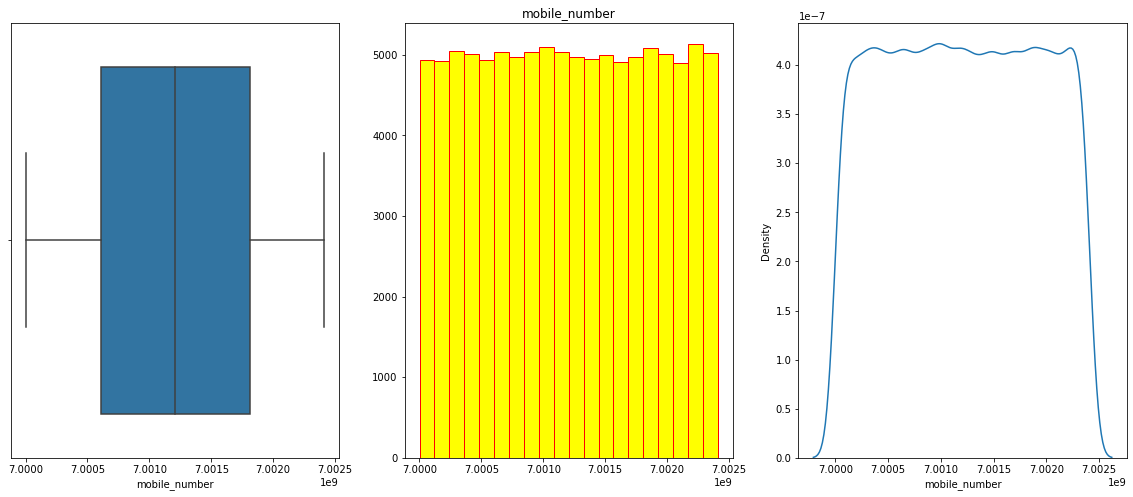

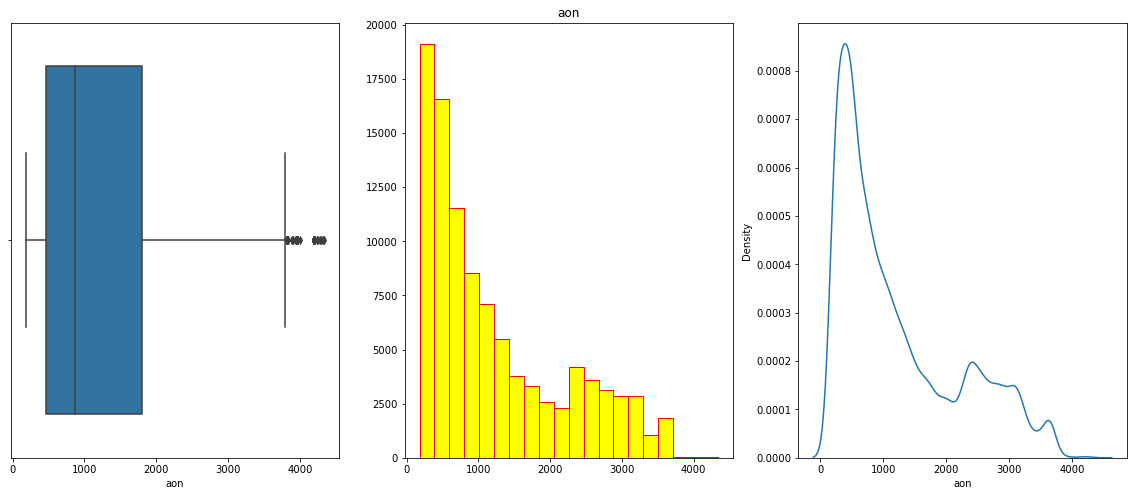

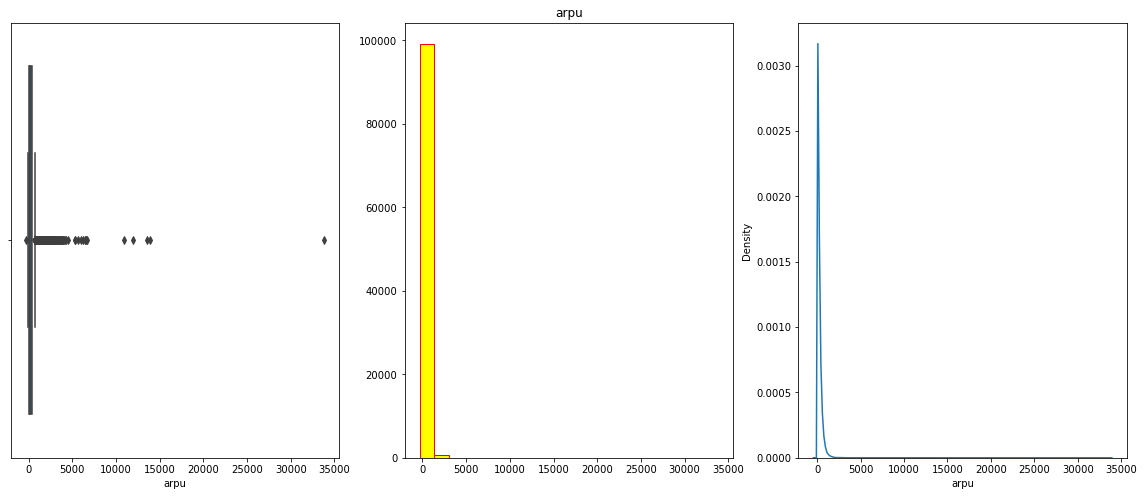

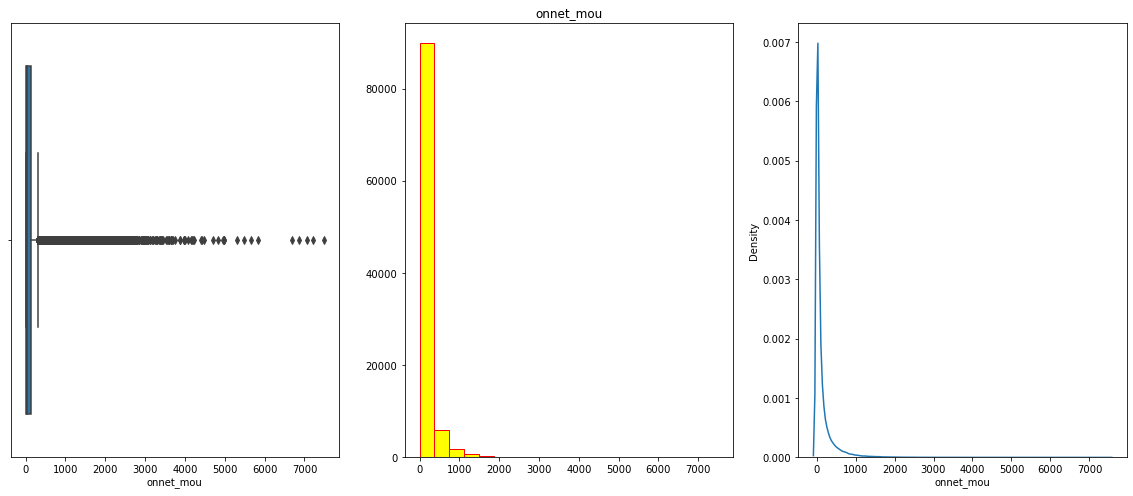

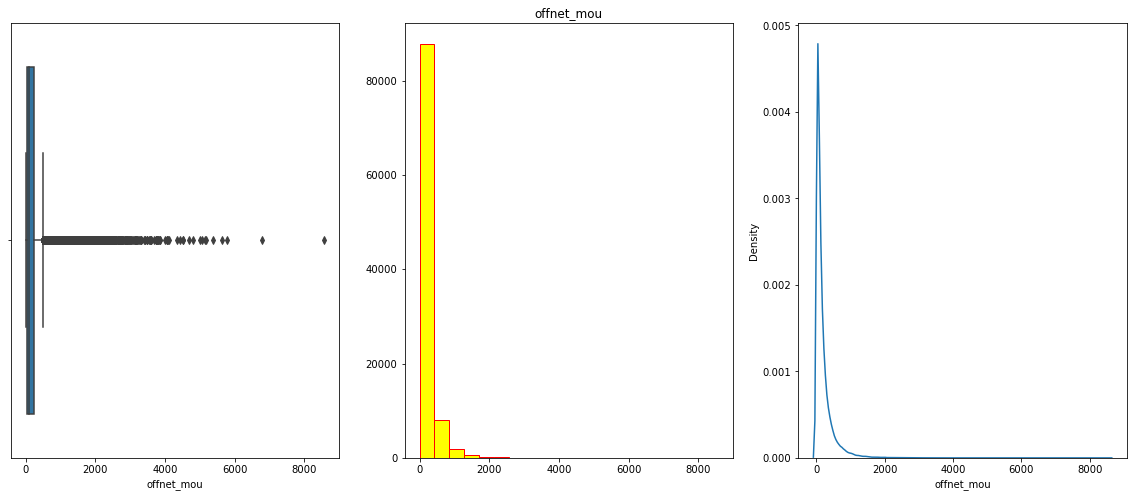

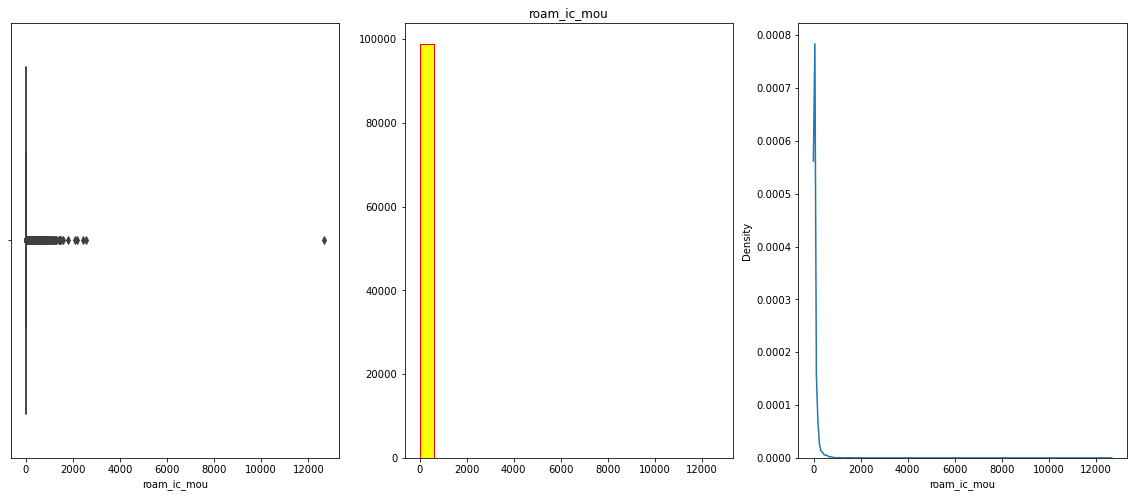

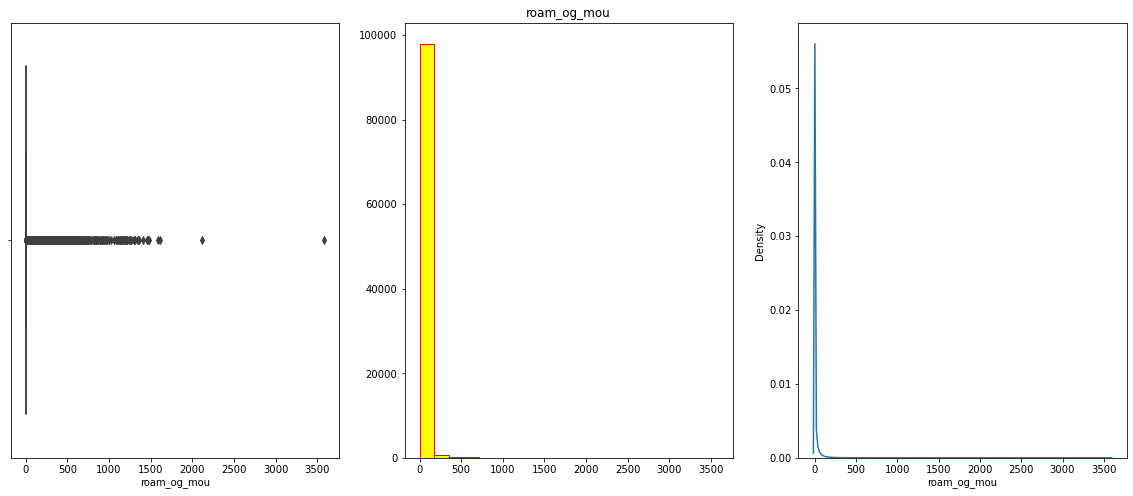

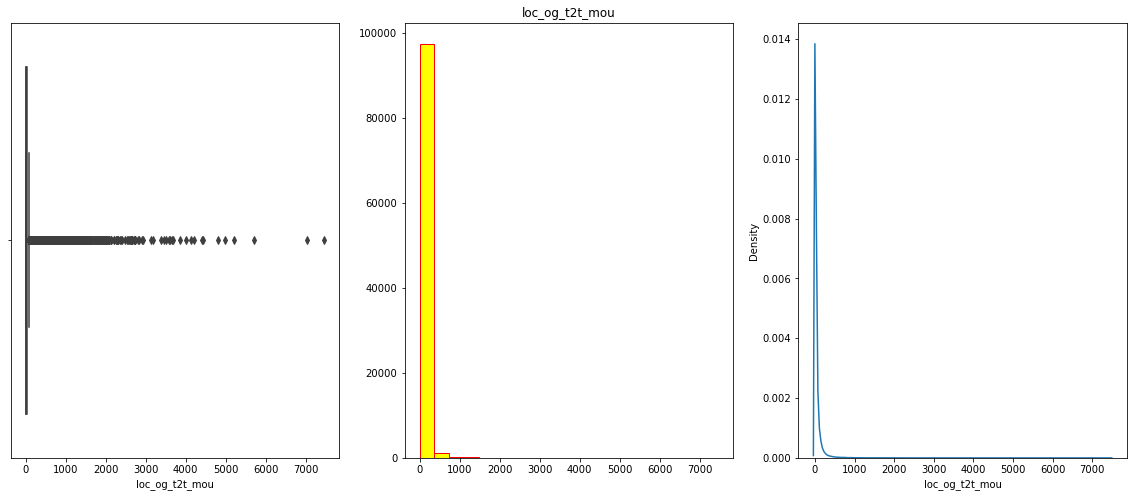

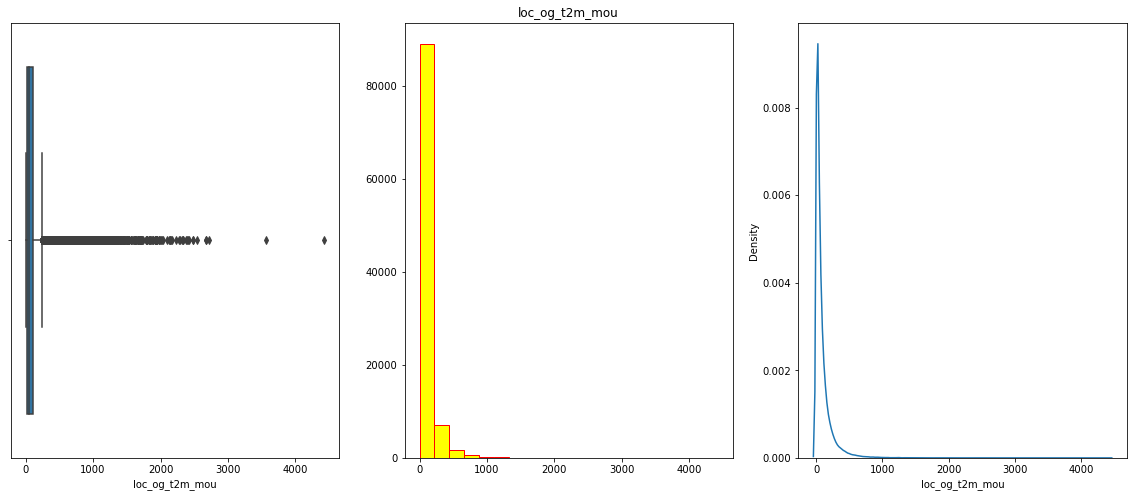

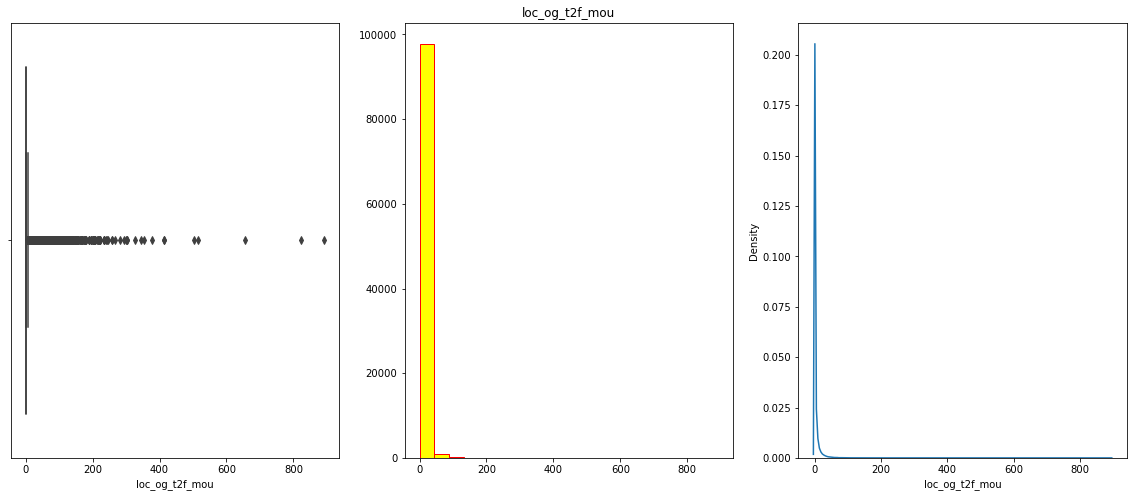

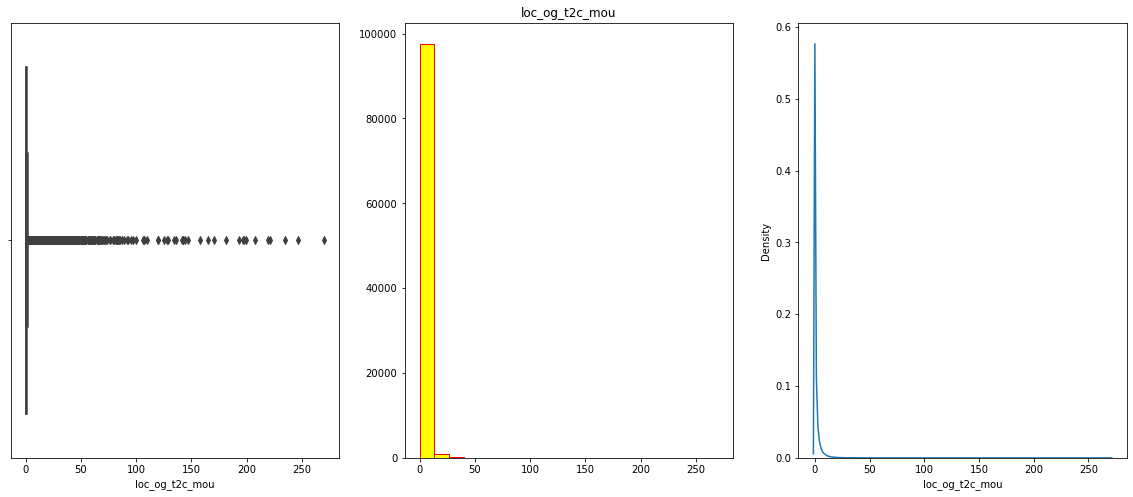

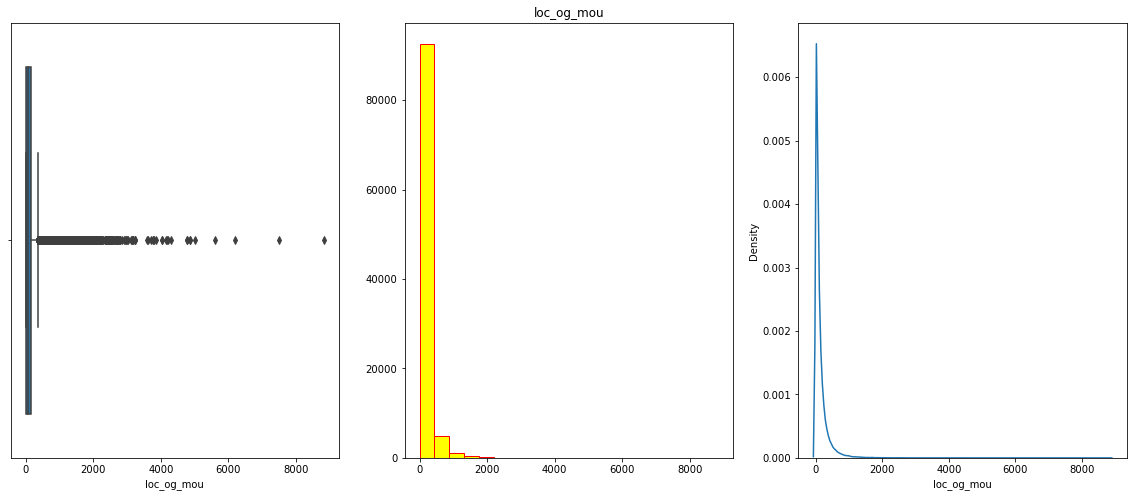

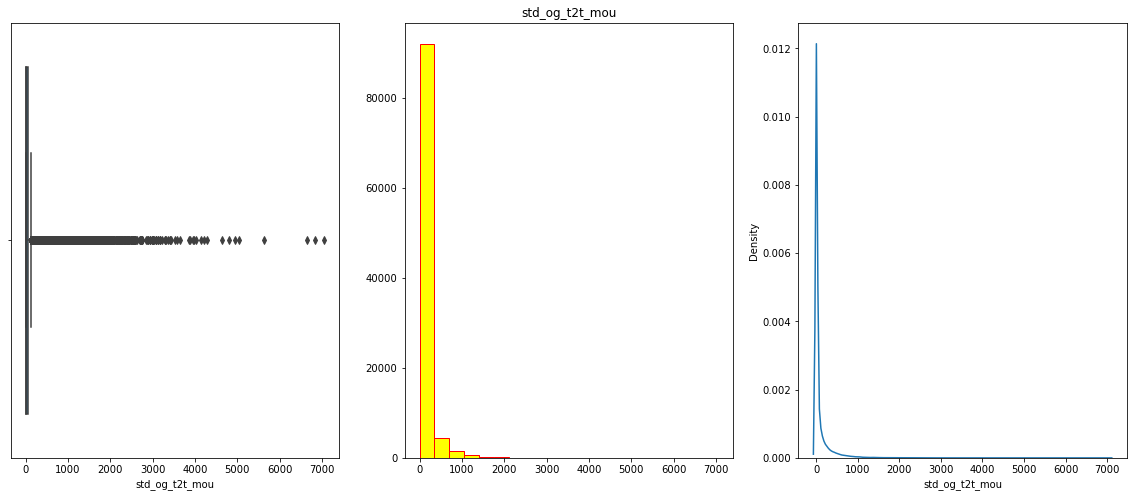

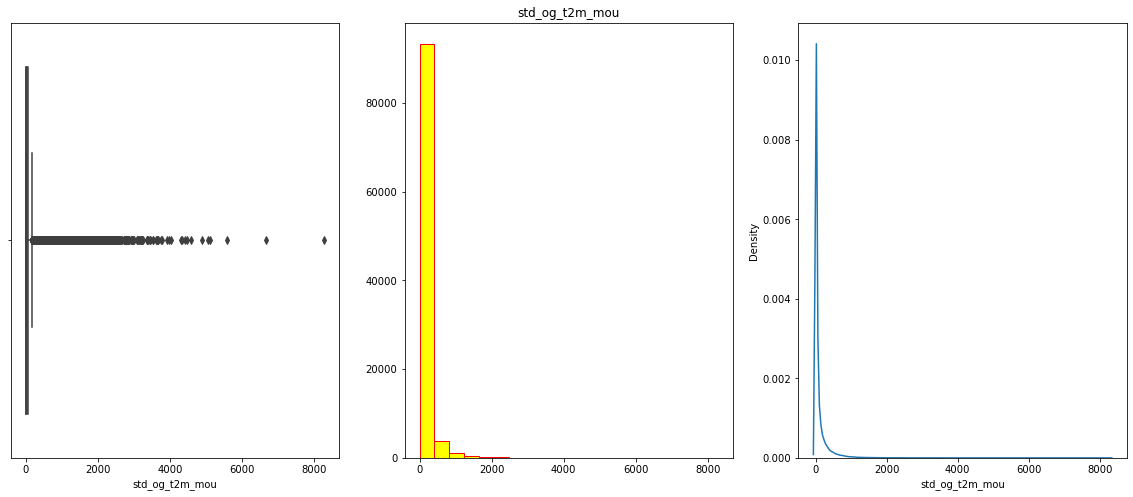

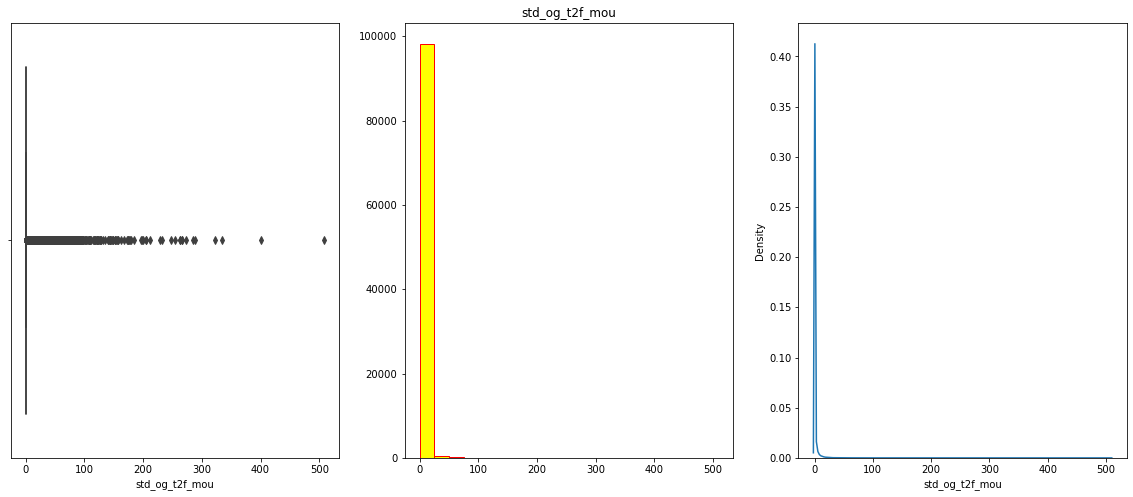

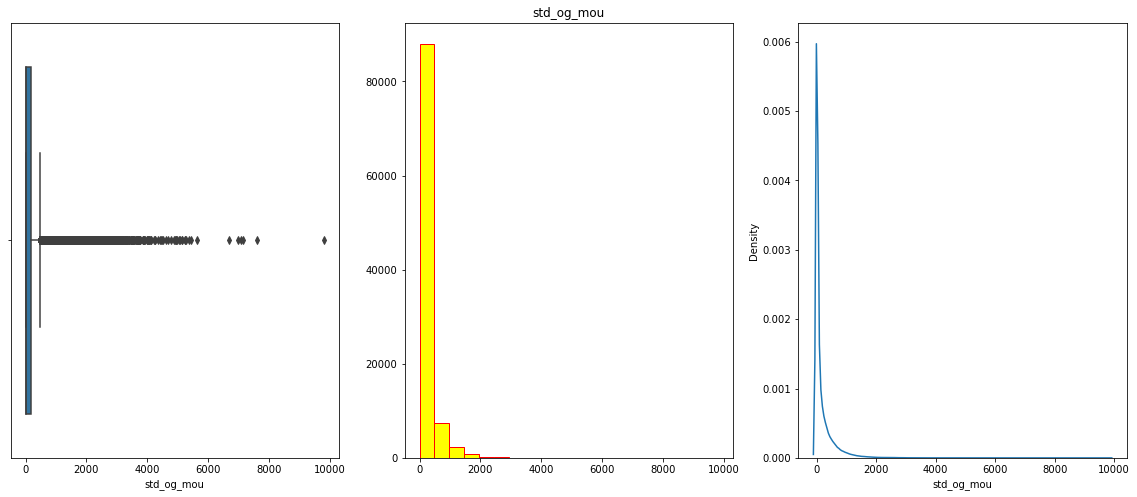

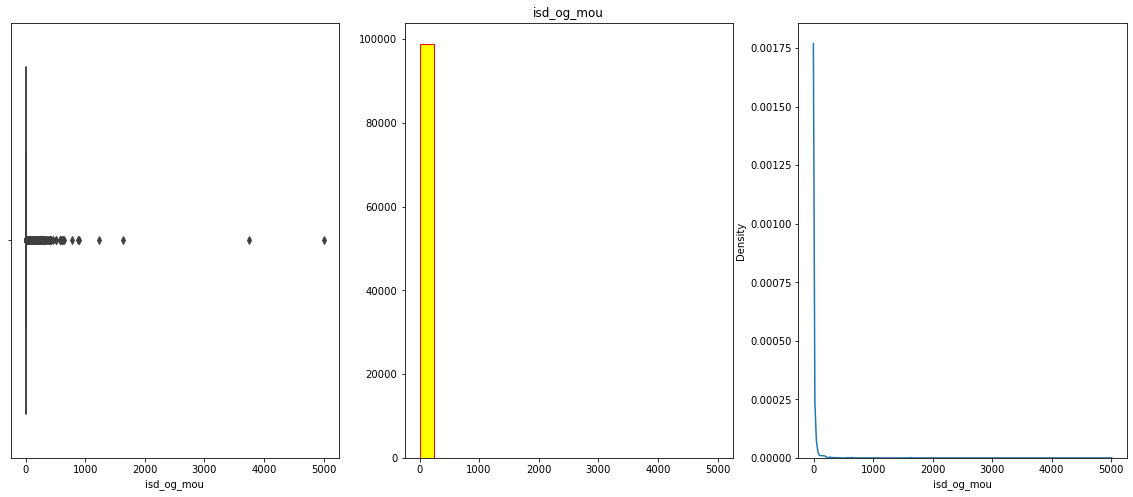

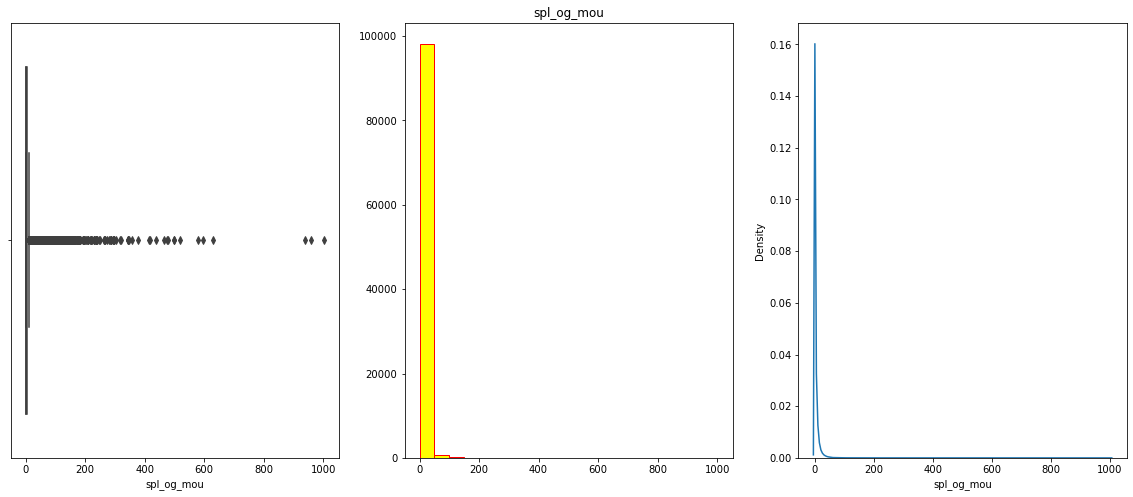

In [33]:
for col in data1:
    plt.figure(figsize= (20, 8))
    plt.subplot(1,3, 1)
    sns.boxplot(x = col, data = data)
    plt.subplot(1,3, 2)
    plt.hist(x = col, data = data, edgecolor='red',color='yellow', bins=20)
    plt.title(col)
    plt.subplot(1,3, 3)
    sns.kdeplot(x = col, data = data)
    plt.show()

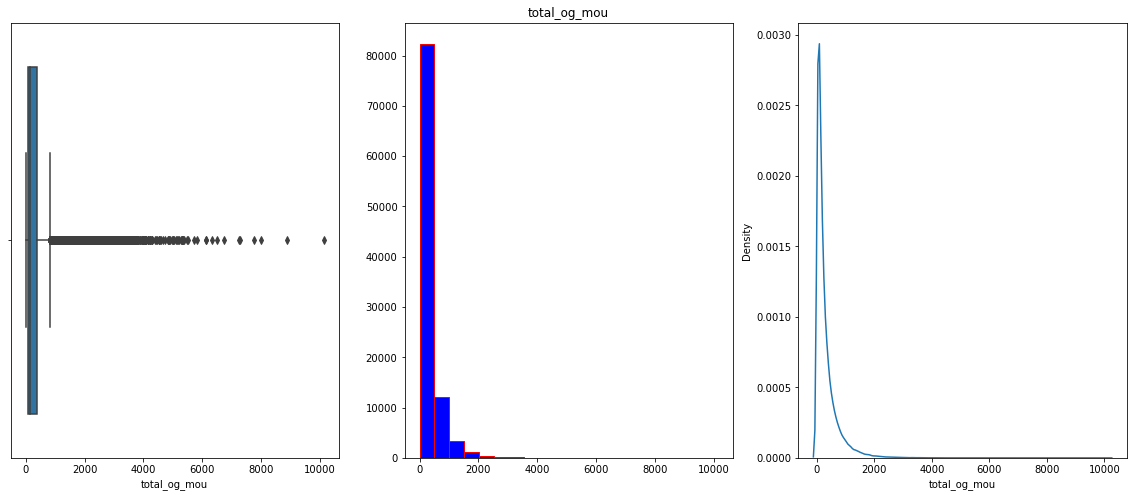

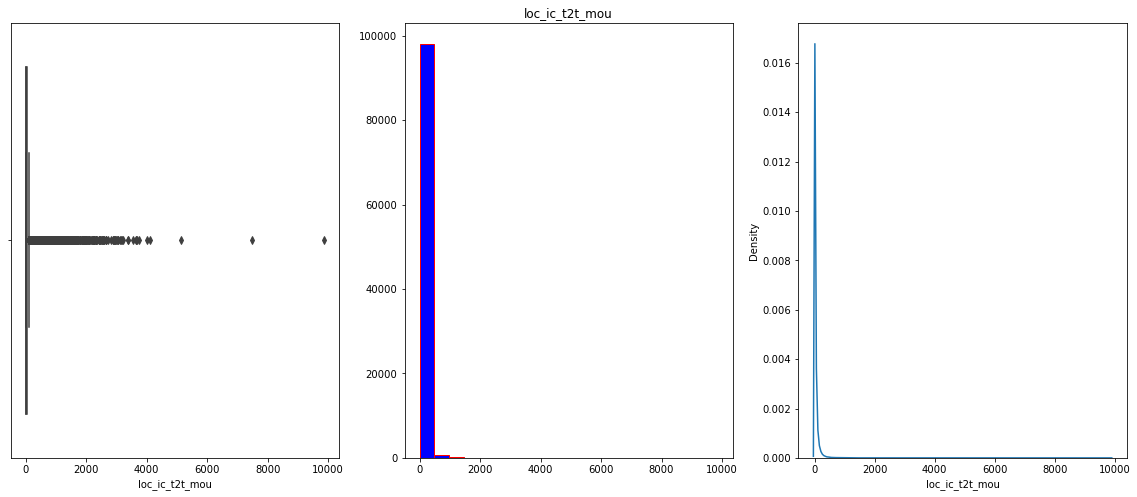

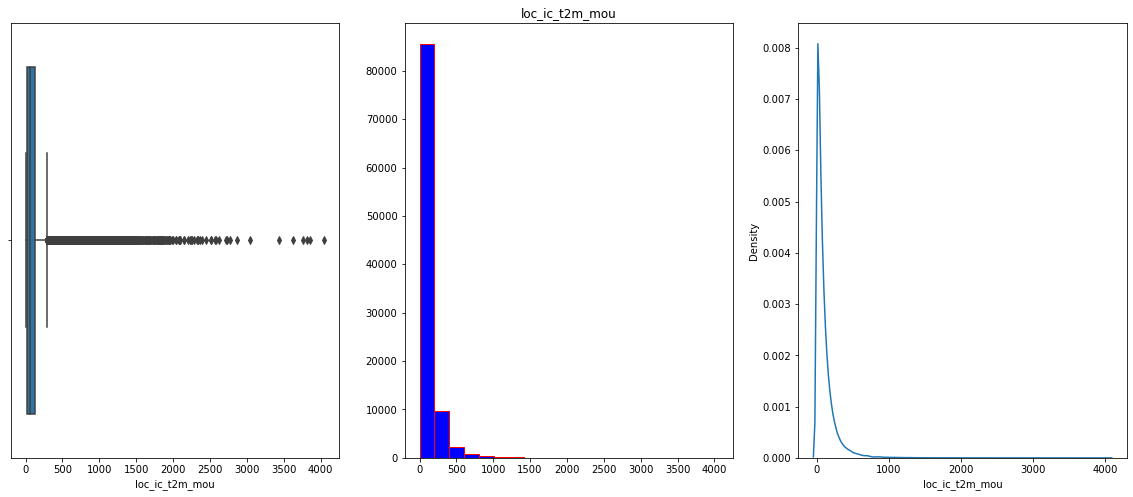

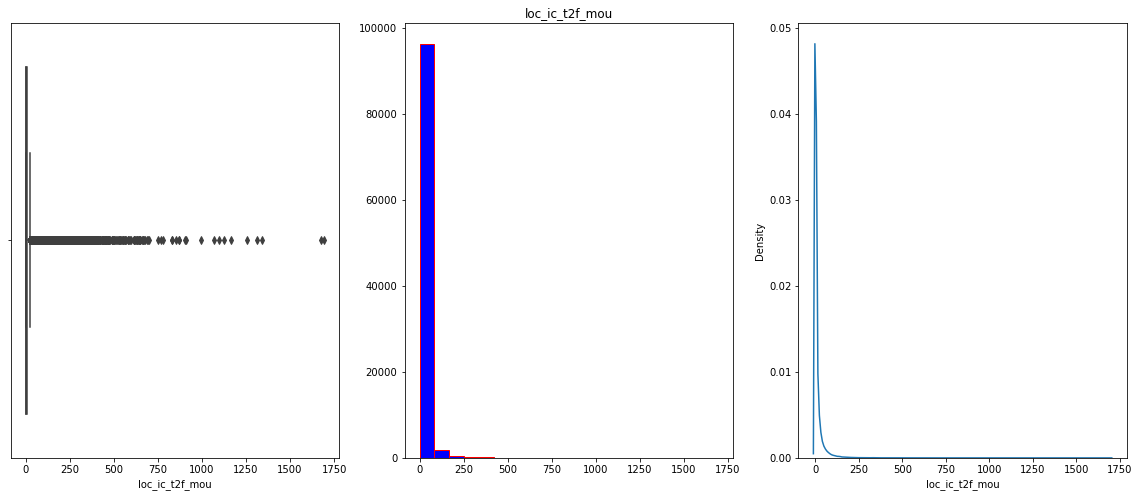

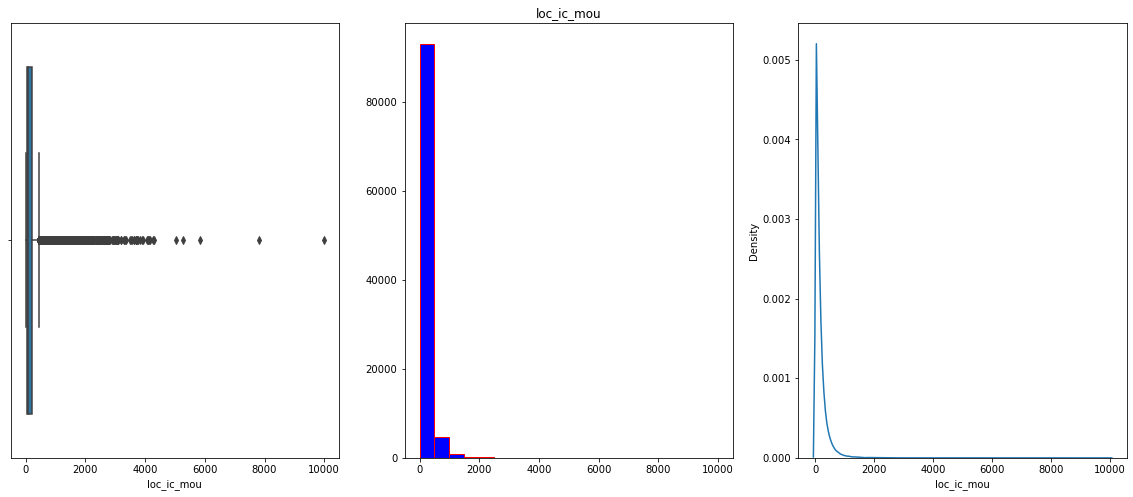

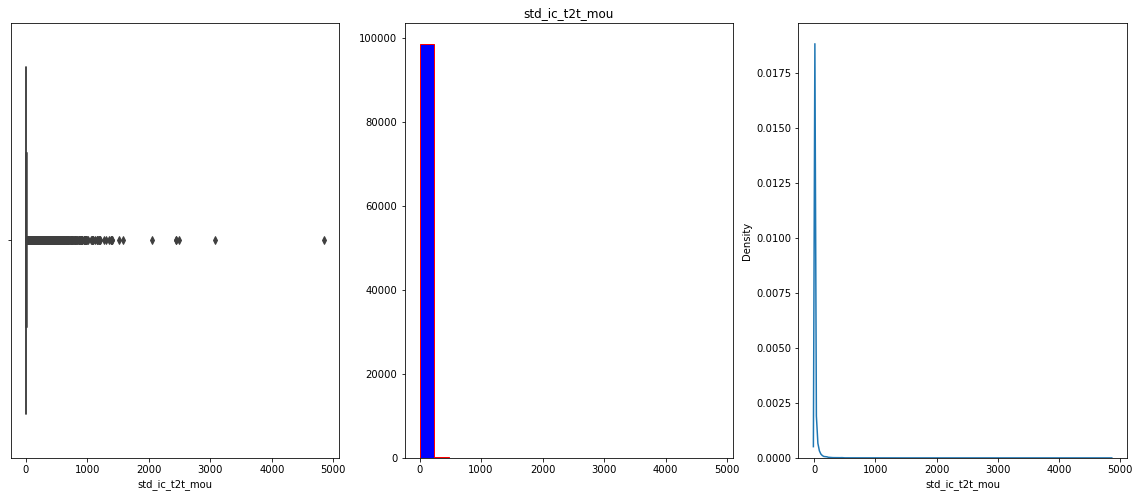

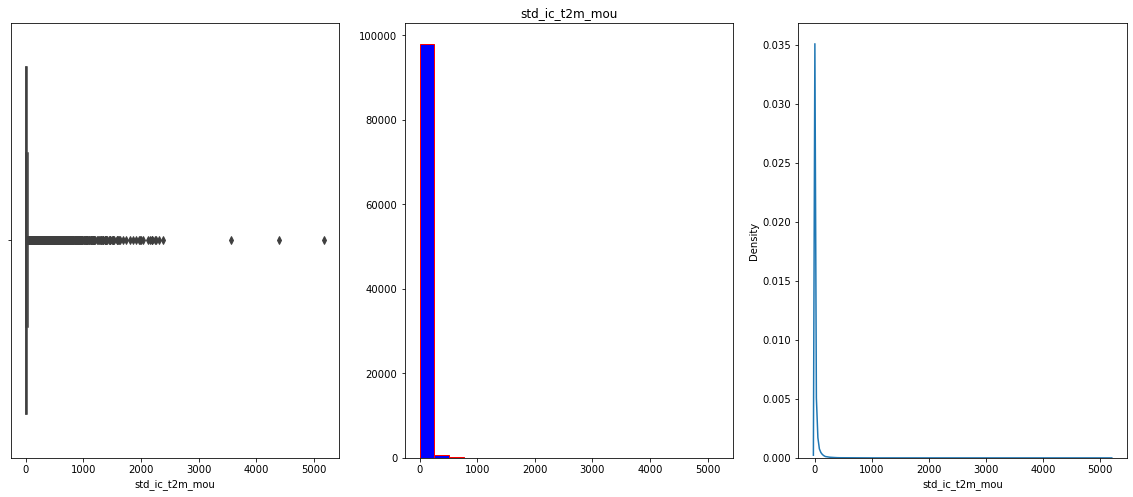

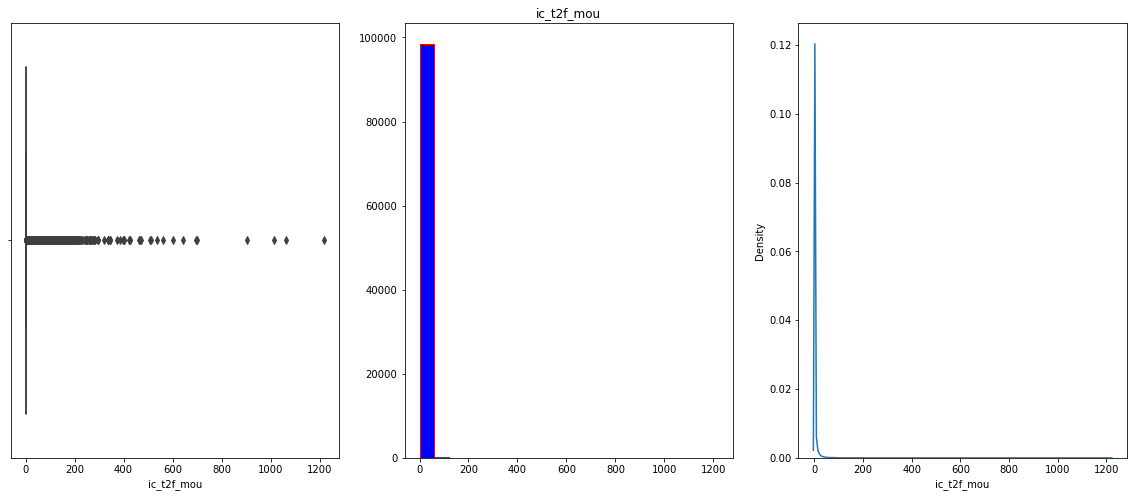

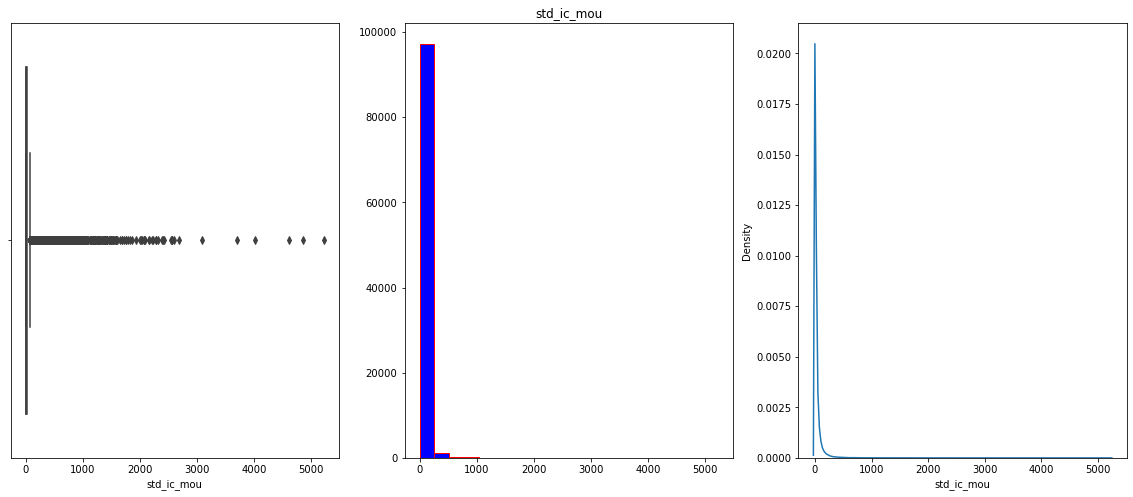

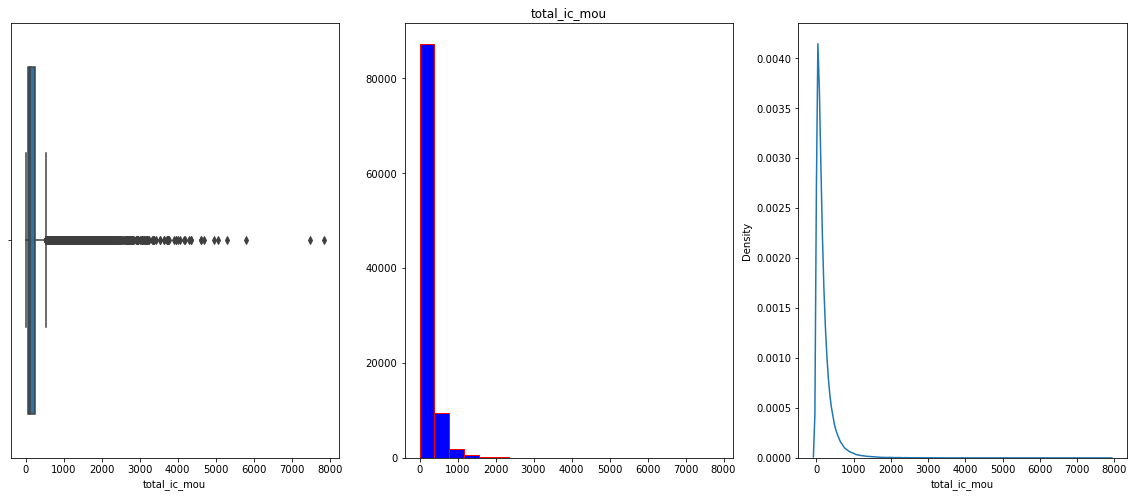

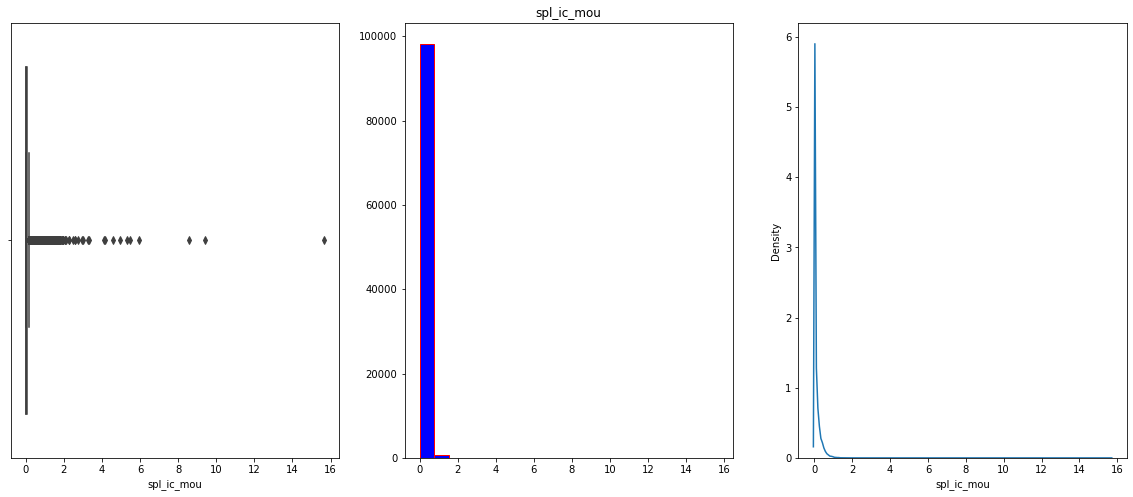

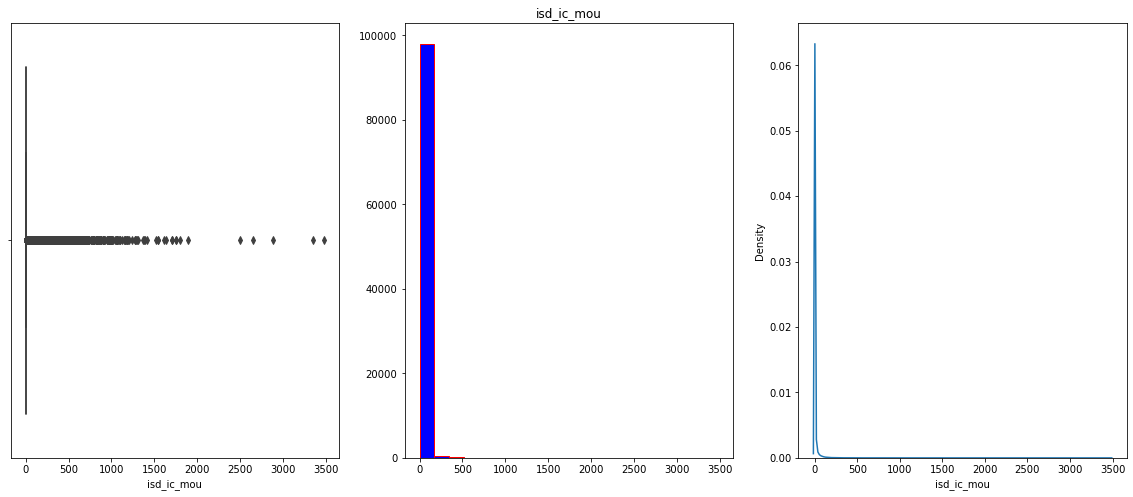

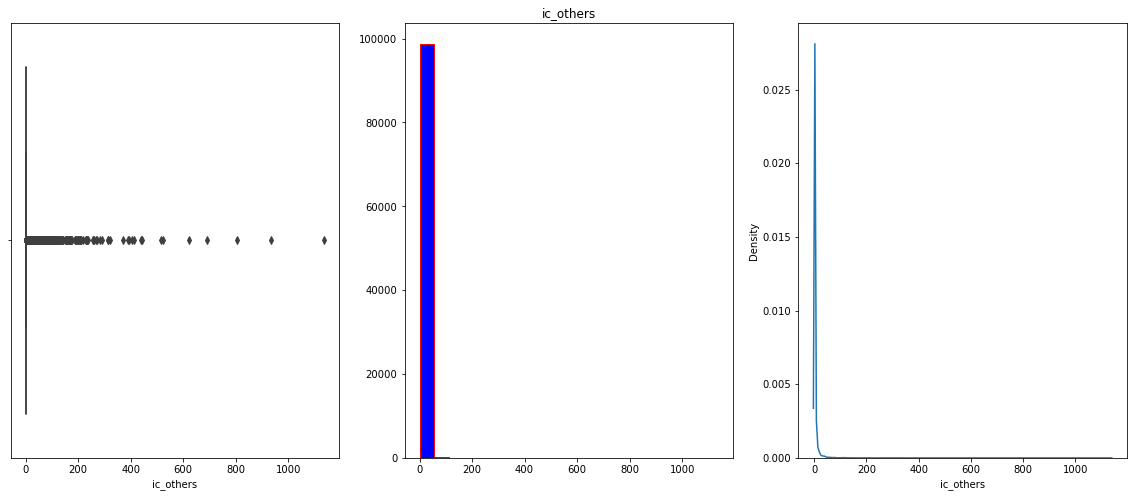

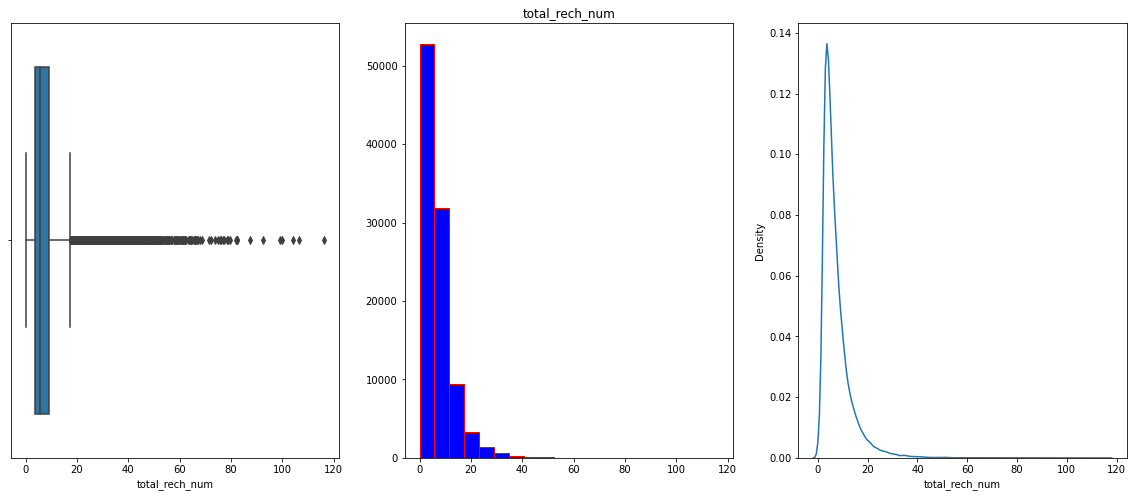

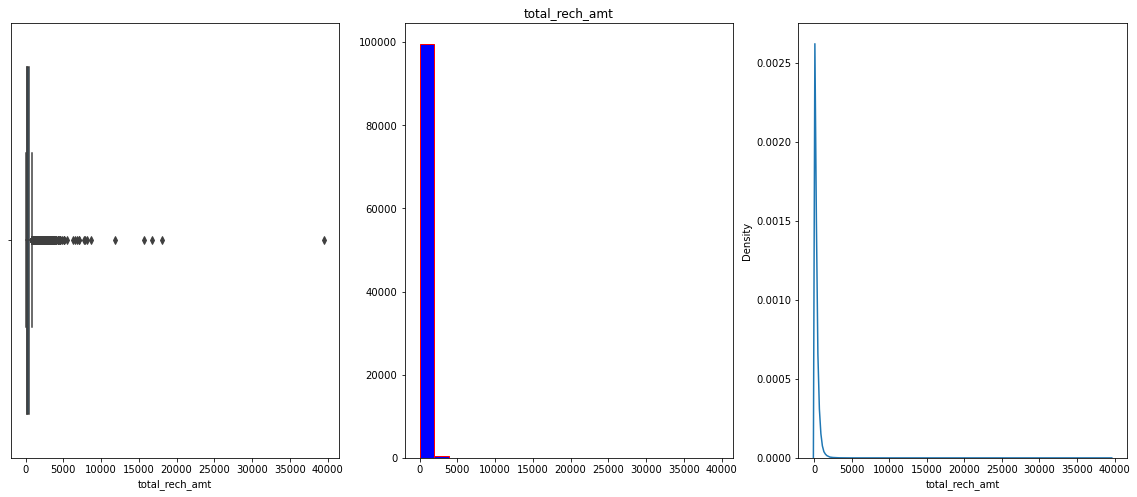

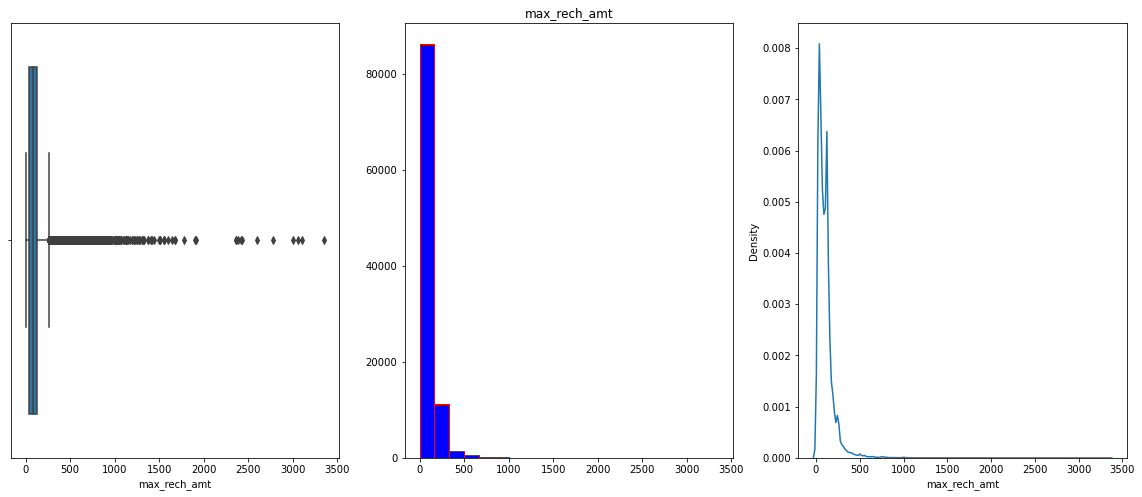

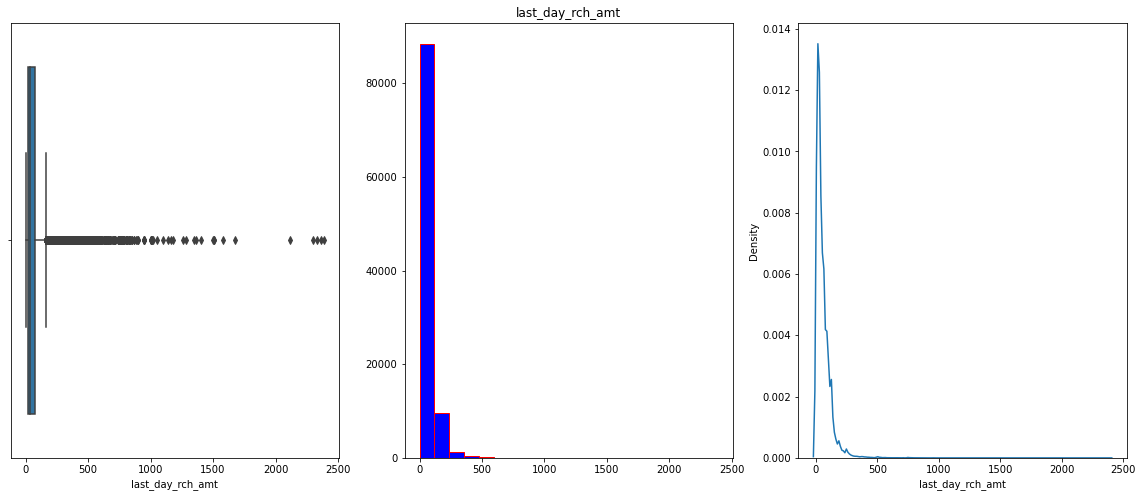

In [35]:
for col in data2:
    plt.figure(figsize= (20, 8))
    plt.subplot(1,3, 1)
    sns.boxplot(x = col, data = data)
    plt.subplot(1,3, 2)
    plt.hist(x = col, data = data, edgecolor='red',color='blue', bins=20)
    plt.title(col)
    plt.subplot(1,3, 3)
    sns.kdeplot(x = col, data = data)
    plt.show()

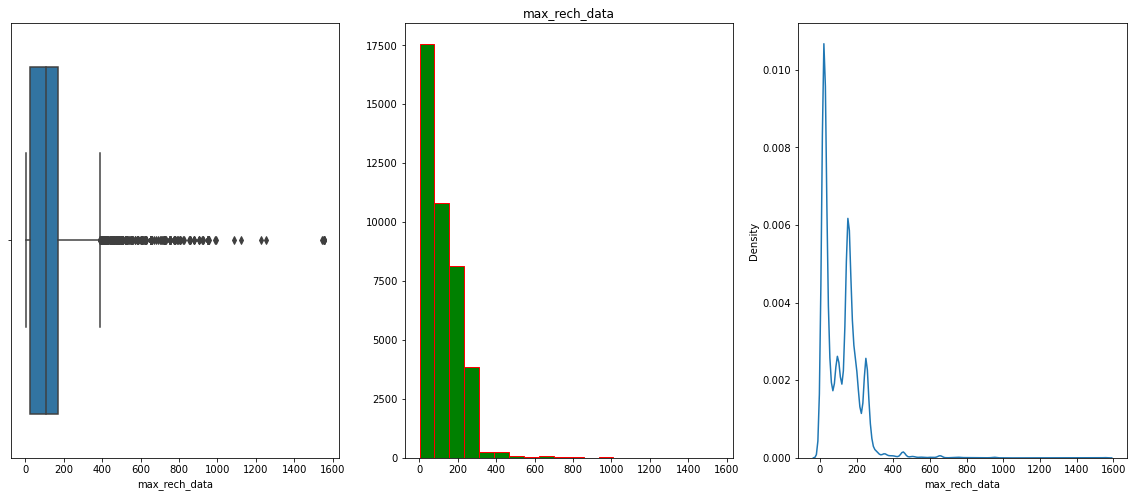

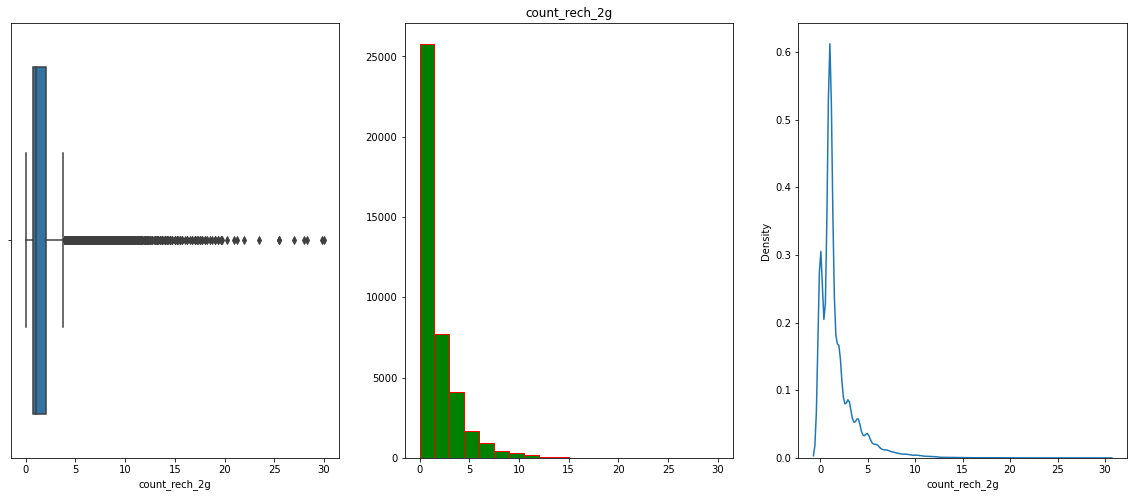

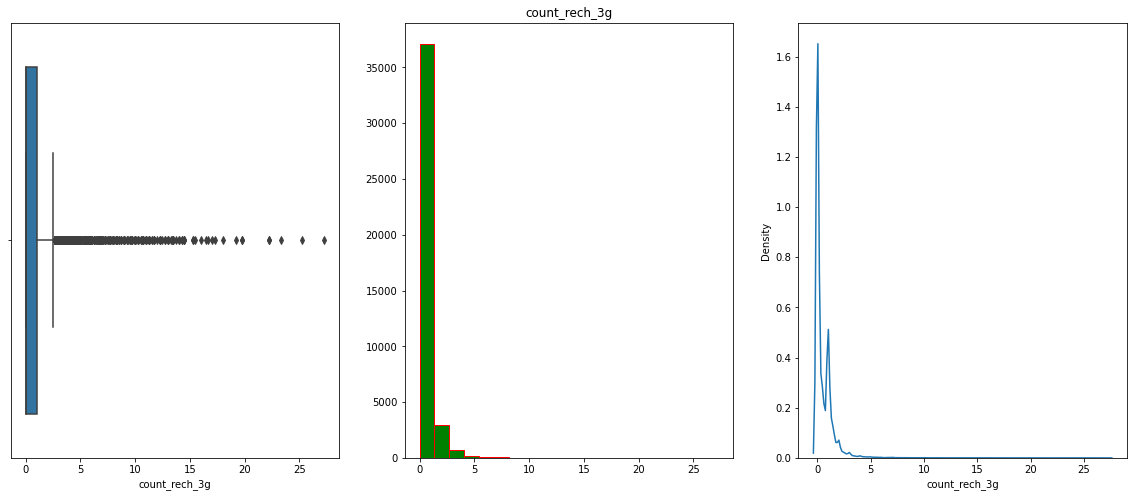

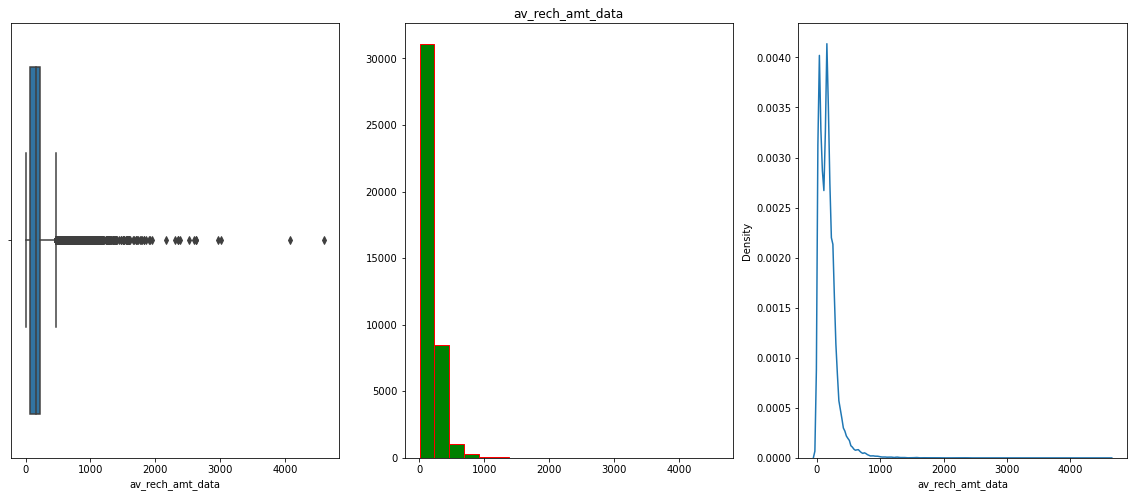

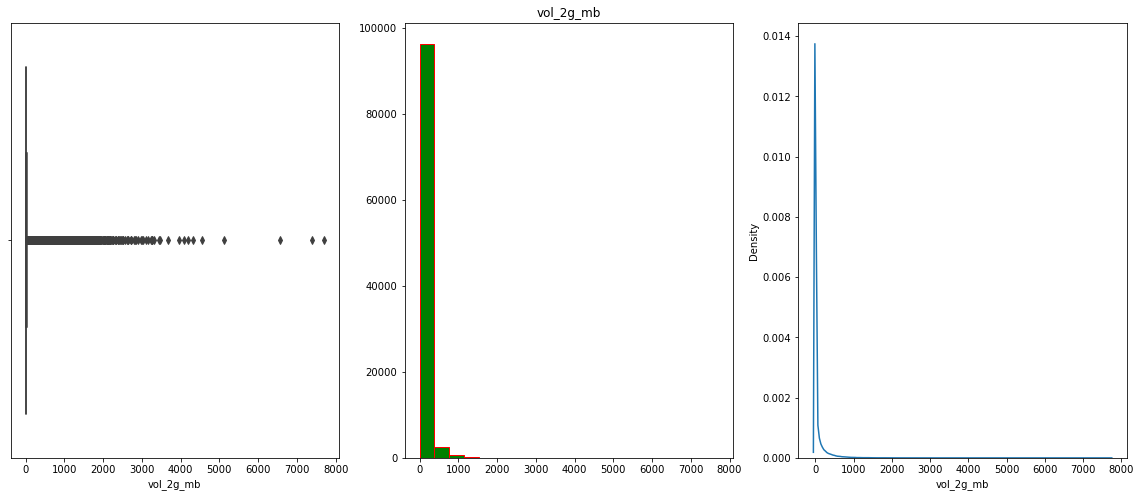

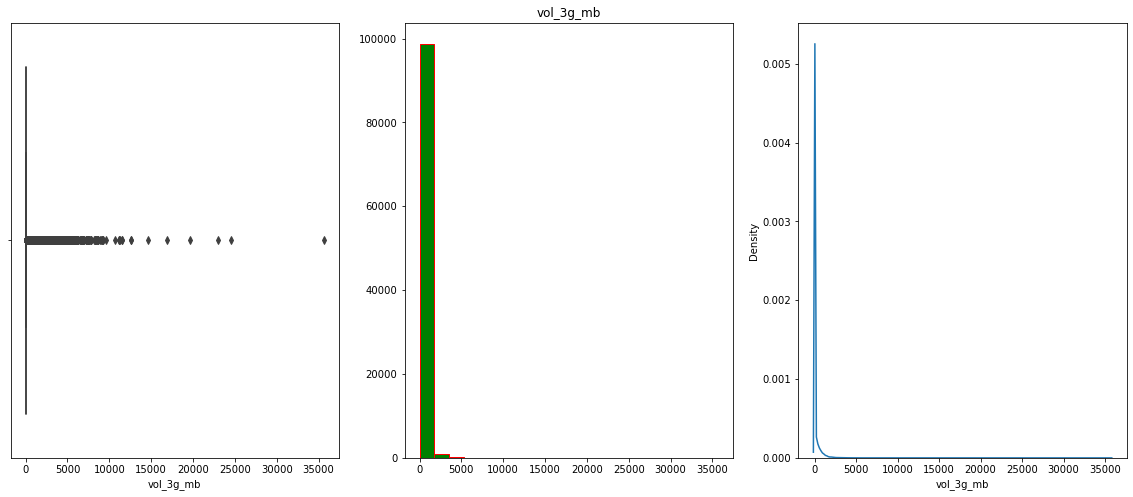

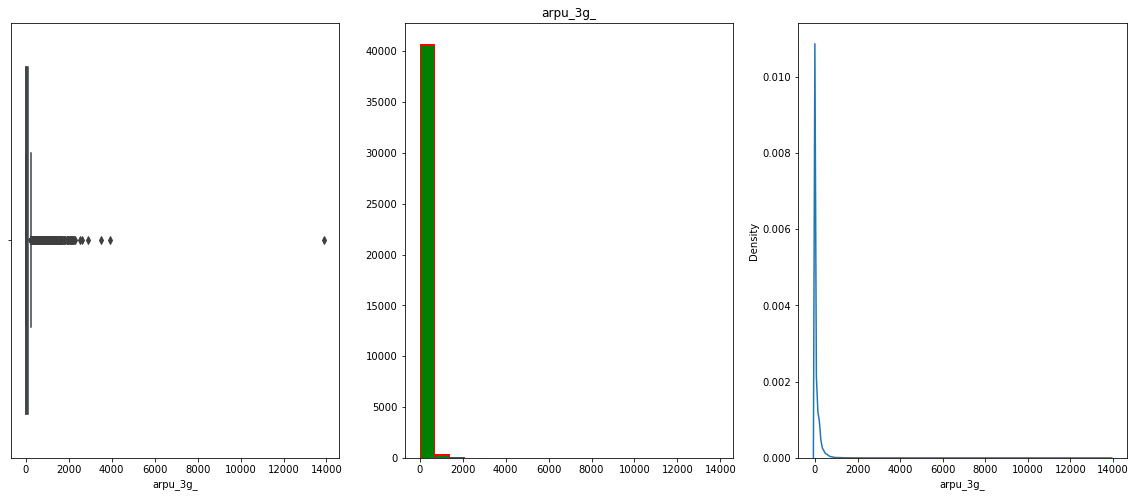

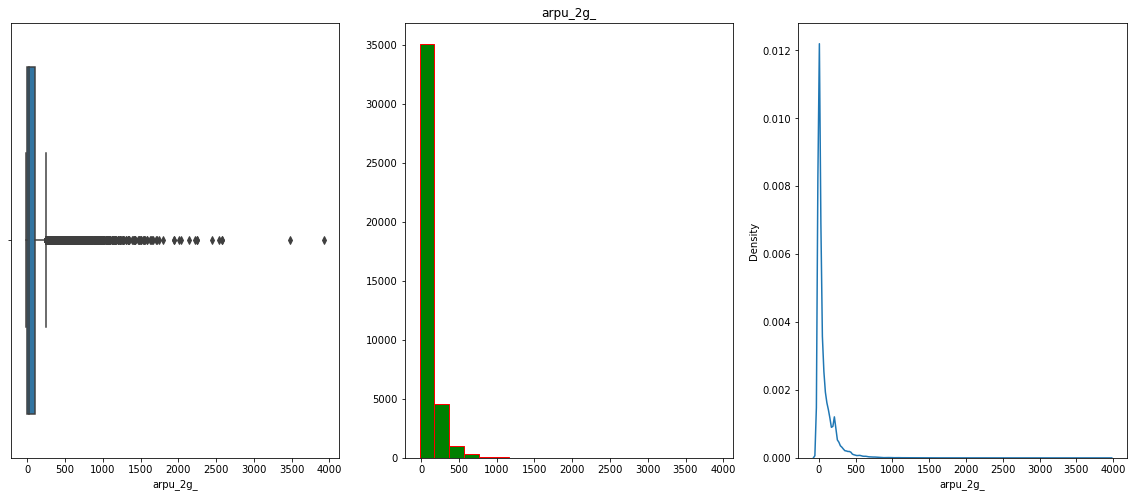

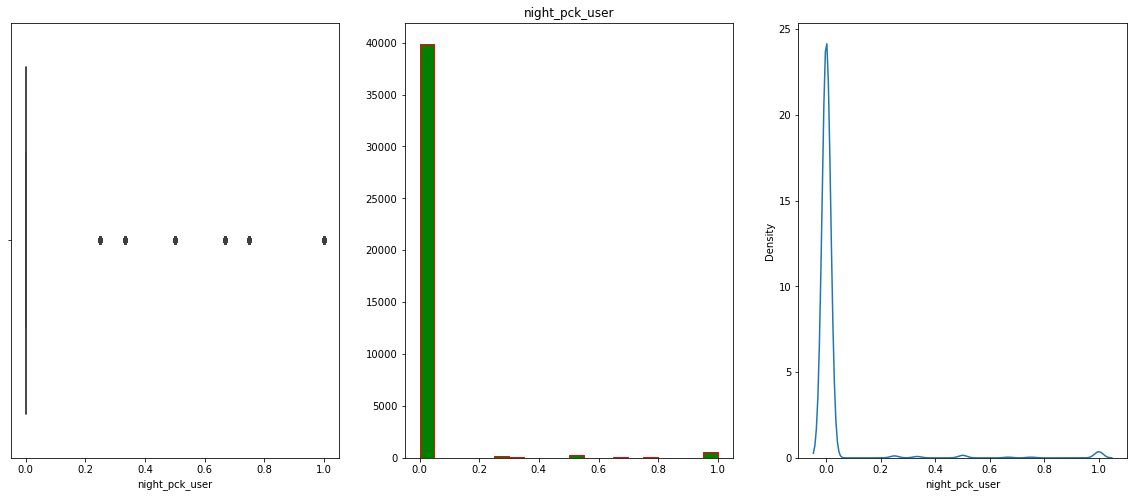

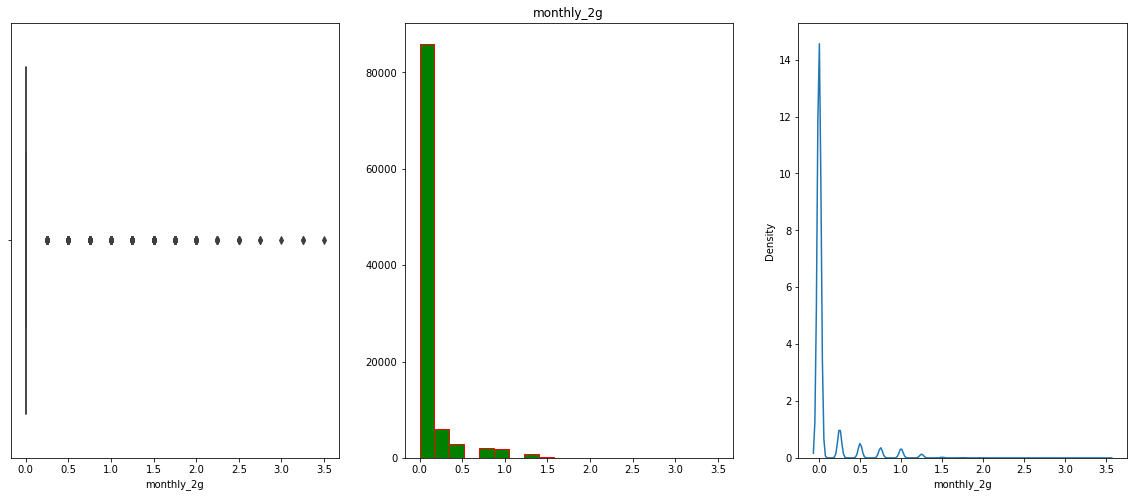

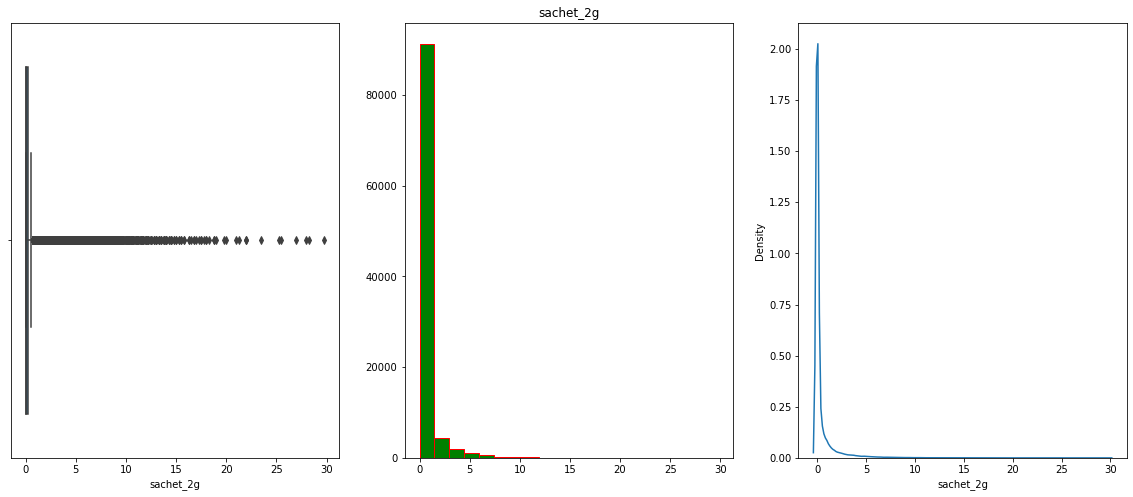

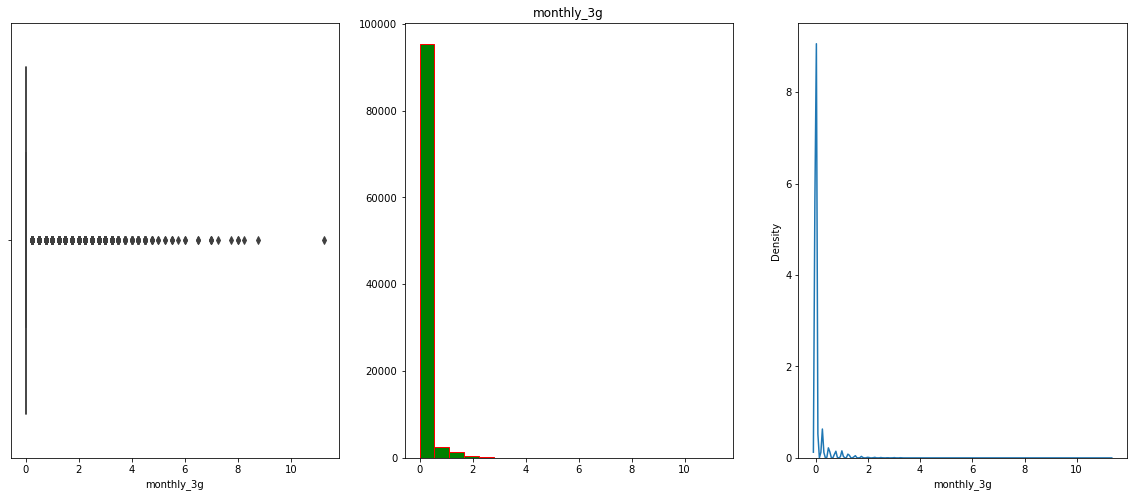

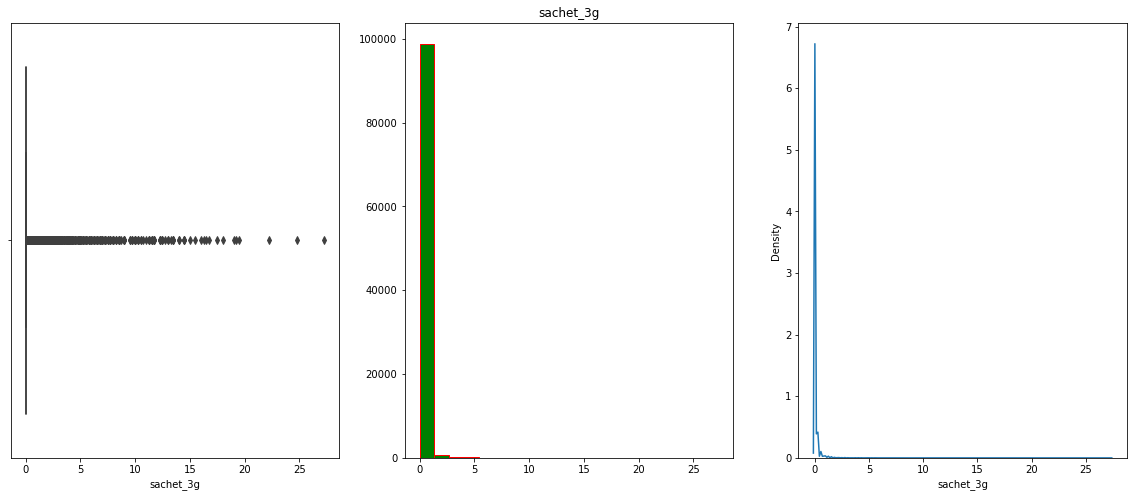

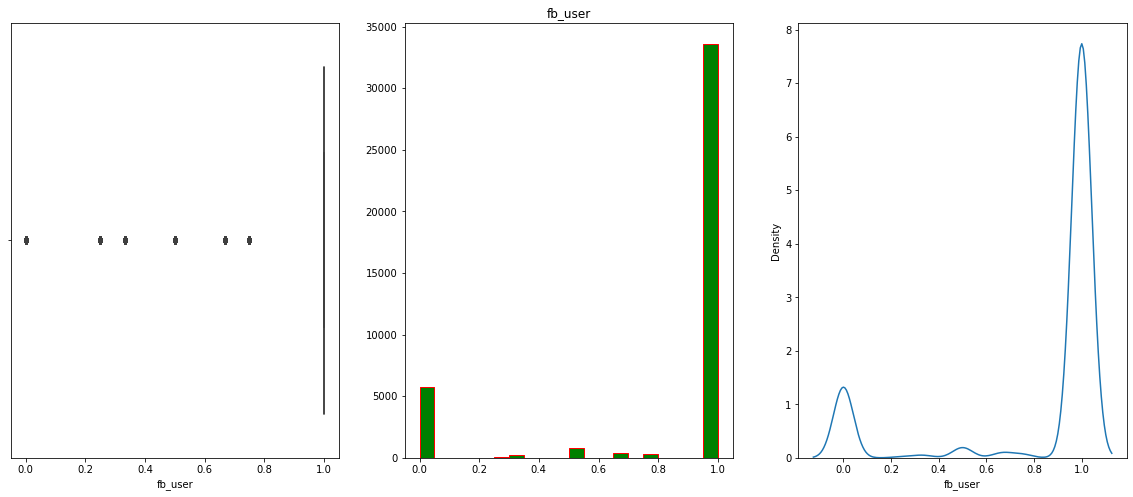

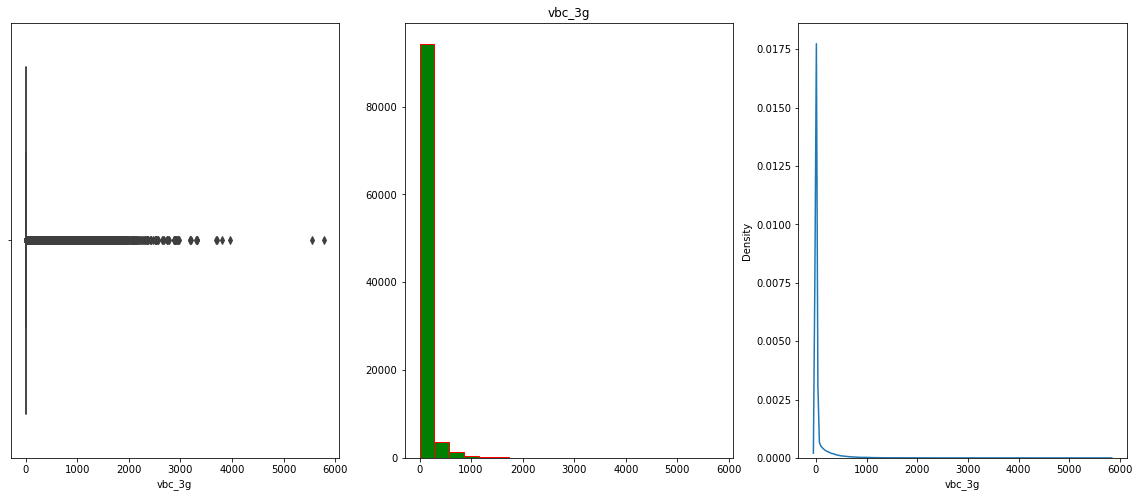

In [37]:
for col in data3:
    plt.figure(figsize= (20, 8))
    plt.subplot(1,3, 1)
    sns.boxplot(x = col, data = data)
    plt.subplot(1,3, 2)
    plt.hist(x = col, data = data, edgecolor='red',color='green', bins=20)
    plt.title(col)
    plt.subplot(1,3, 3)
    sns.kdeplot(x = col, data = data)
    plt.show()

## INFERENCES

* Mobile number - Data is normally distributed and we will drop this column as it is of no use in model building

* Fb_user, night_pck_user - It is a classification Column as the values present is in the range (0,1). So, we are considering threshold of 0.5 and applying values 0 & 1 considering the threshold. Moreover the fb_user data is left skewed and outliers are present whereas night_pck_user is right skewed and very less outliers are present.

* Remaining Columns are right skewed and outliers are present

In [30]:
def thresh_func(x):
    if x < 0.5:
        return 0
    elif x >= 0.5:
        return 1
    else:
        return x

In [31]:
data['fb_user'] = data['fb_user'].apply(thresh_func)

In [32]:
data['night_pck_user'] = data['night_pck_user'].apply(thresh_func)

* We considered threshold in these two columns because the values in these columns are in the range (0 , 1)

# MULTIVARIATE ANALYSIS

In [33]:
data_1 = data.iloc[:, 0:5]
data_1.head()

mobile_number   aon       arpu  onnet_mou  offnet_mou
0     7000842753   968  161.77600     0.0000      0.0000
1     7001865778  1006  185.93175    32.2025    118.5250
2     7001625959  1103  214.42200    44.7125    172.7975
3     7001204172  2491  342.49850   176.7475    104.3850
4     7000142493  1526  243.27800    85.6050     84.7275

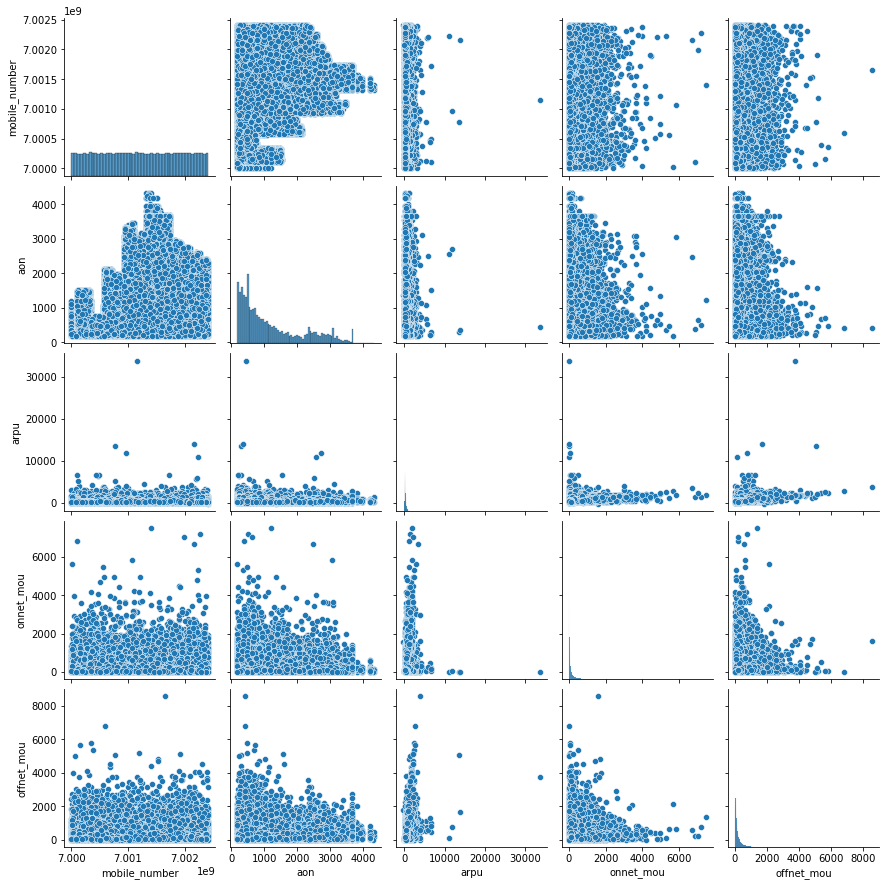

In [40]:
sns.pairplot(data_1)
plt.show()

* As we can see from the pairplot the relation between arpu and offnet_mou is that its having a positive correlation 
i.e. when arpu increases offnet_mou increases.

* As we can see from the pairplot the relation between onnet_mou and offnet_mou is that its having a negative correlation 
i.e. when onnet_mou decreases offnet_mou decreases.

* As we can see from the pairplot the relation between arpu and onnet_mou is that its having a negative correlation i.e. when arpu decreases onnet_mou decreases

* Arpu is not having any change compared to other columns i.e. the value of arpu on X axis doesn't change as other columns on Y axis tends to change.

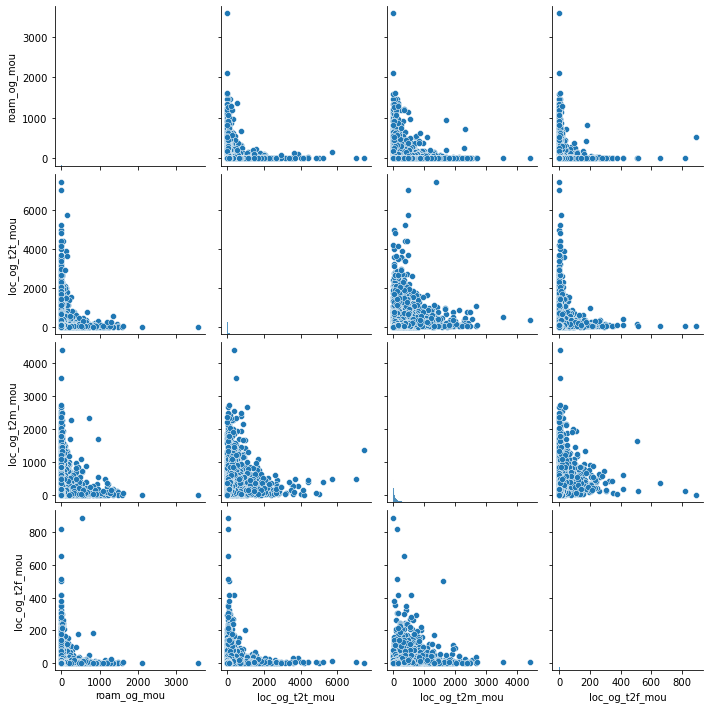

In [263]:
data_2 = data.iloc[:, 6:10]
sns.pairplot(data_2)
plt.show()

* All the columns are negatively correlated with each other

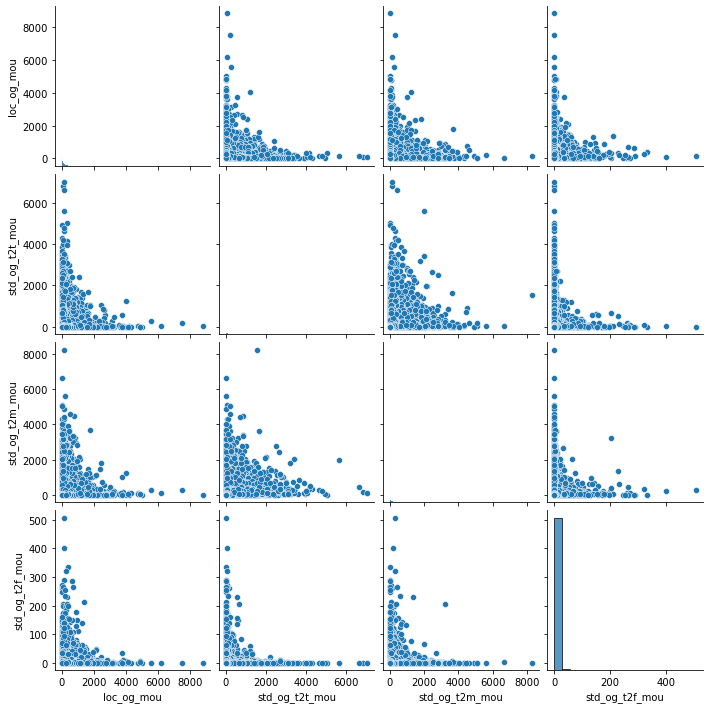

In [42]:
data_3 = data.iloc[:, 11:15]
sns.pairplot(data_3)
plt.show()

* All the columns are negatively correlated with each other

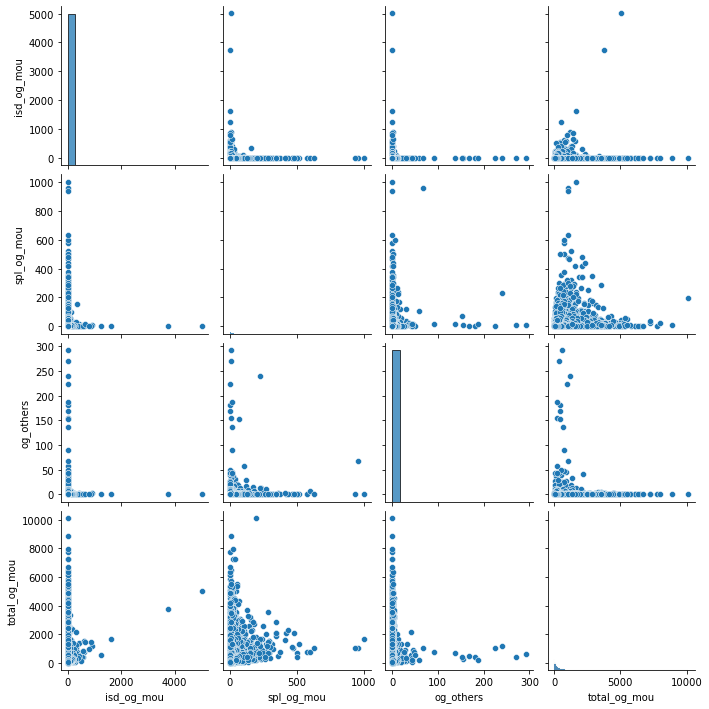

In [265]:
data_4 = data.iloc[:, 16:20]
sns.pairplot(data_4)
plt.show()

* As we can see from the pairplot the relation between columns(isd_og_mou, spl_og_mou) and total_og_mou is that its having a positive correlation i.e. when columns(isd_og_mou, spl_og_mou) increases total_og_mou increases

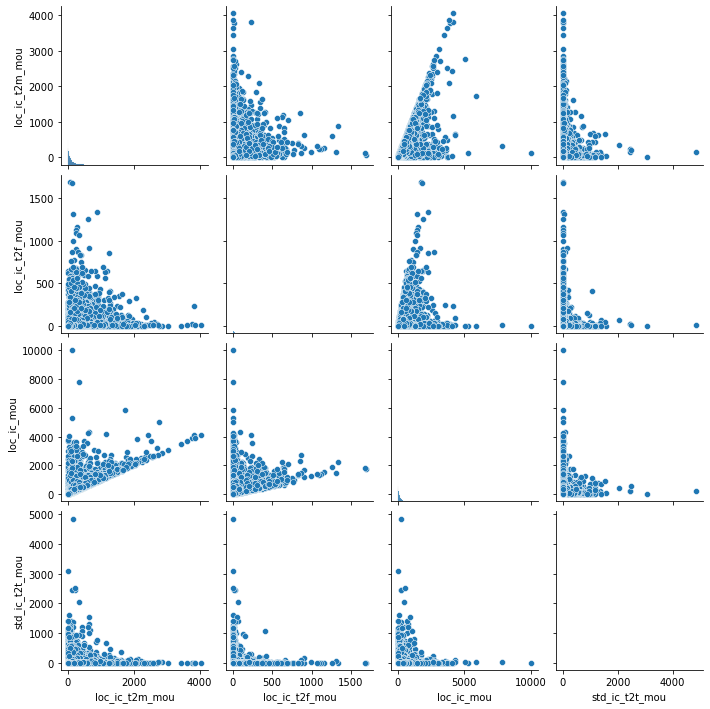

In [44]:
data_5 = data.iloc[:, 21:25]
sns.pairplot(data_5)
plt.show()

* As we can see from the pairplot the relation between loc_ic_t2t_mou and loc_ic_mou is that its having a positive correlation 
i.e. when loc_ic_t2t_mou increases loc_ic_mou increases.
* As we can see from the pairplot the relation between loc_ic_t2f_mou and loc_ic_mou is that its having a positive correlation 
i.e. when loc_ic_t2f_mou increases loc_ic_mou increases.
* As we can see from the pairplot the relation between loc_ic_mou and loc_ic_t2m_mou is that its having a positive correlation 
i.e. when loc_ic_mou increases loc_ic_t2m_mou increases.
* As we can see from the pairplot the relation between std_ic_t2t_mou and columns(loc_ic_t2m_mou,loc_ic_t2f_mou, loc_ic_mou ) 
is that its having a negative correlation i.e. when std_ic_t2t_mou decreases columns(loc_ic_t2m_mou,loc_ic_t2f_mou, loc_ic_mou )
decreases.


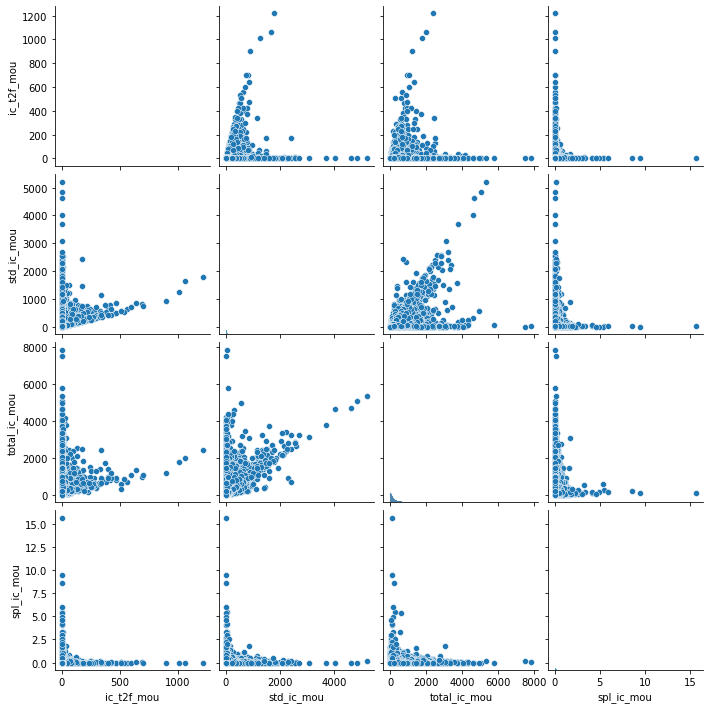

In [45]:
data_6 = data.iloc[:, 26:30]
sns.pairplot(data_6)
plt.show()

* All columns are positively correlated with each other

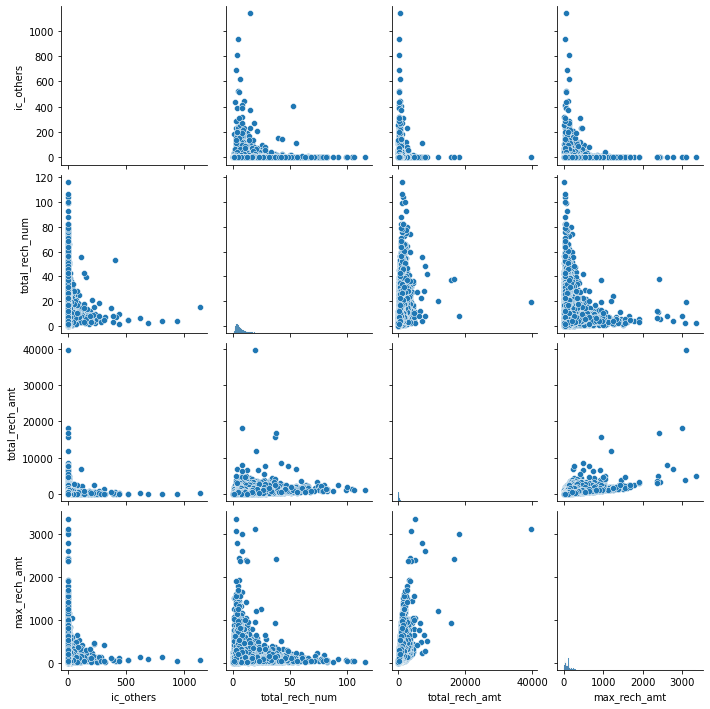

In [46]:
data_7 = data.iloc[:, 31:35]
sns.pairplot(data_7)
plt.show()

* As we can see from the pairplot the relation between total_rech_amt and max_rech_amt is that its having a positive correlation i.e. when total_rech_amt increases max_rech_amt increases.
* Remaining columns are negatively correlated with each other

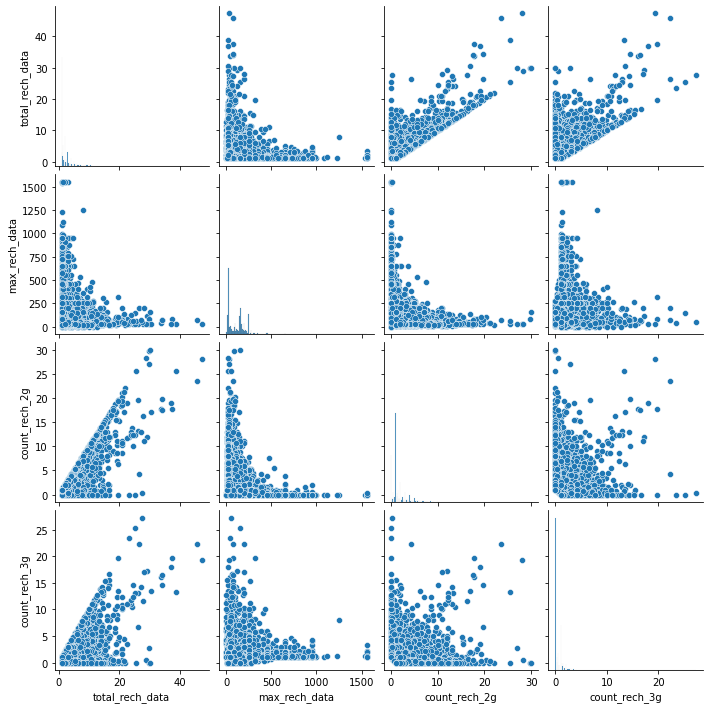

In [264]:
data_8 = data.iloc[:, 36:40]
sns.pairplot(data_8)
plt.show()

* As we can see from the pairplot the relation between columns(count_rech_2g, count_rech_3g) and total_rech_data is that its having a positive correlation i.e. when columns(count_rech_2g, count_rech_3g) increases total_rech_data increases
* Remaining columns are negatively correlated with each other

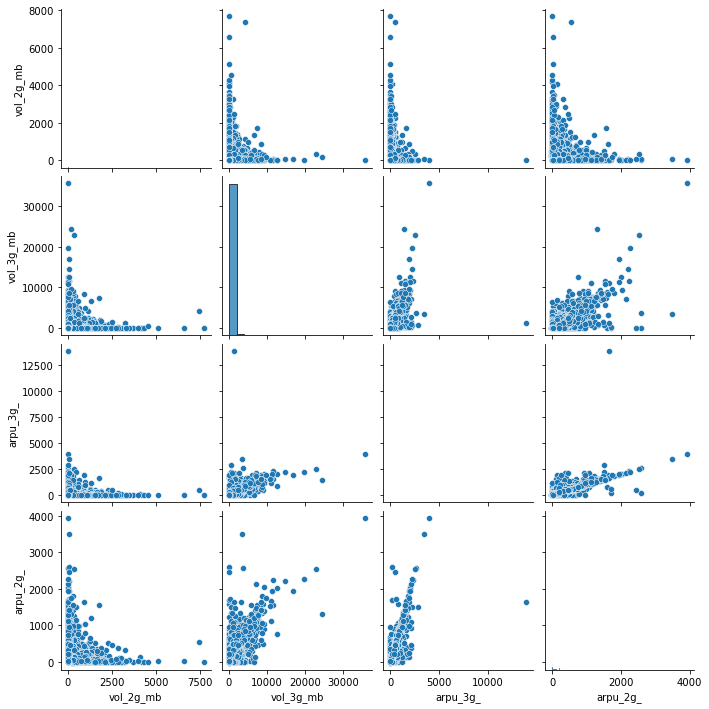

In [48]:
data_9 = data.iloc[:, 41:45]
sns.pairplot(data_9)
plt.show()

* As we can see from the pairplot the relation between arpu_2g and arpu_3g is that its having a positive correlation i.e. when arpu_2g increases arpu_3g increases
* As we can see from the pairplot the relation between arpu_2g and vol_3g_mb is that its having a positive correlation i.e. when arpu_2g increases vol_3g_mb increases
* Remaining columns are negatively correlated with each other


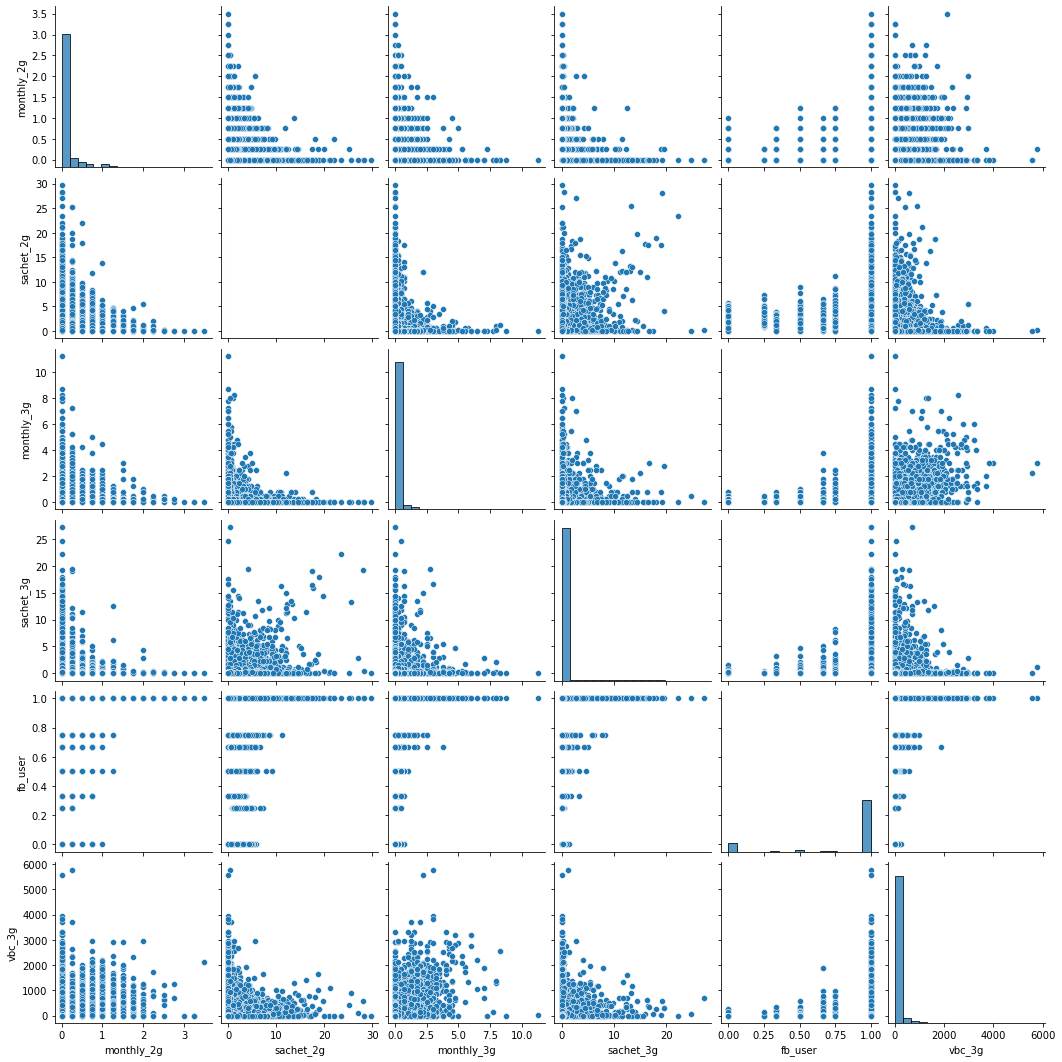

In [49]:
data_10 = data.iloc[:, 46:52]
sns.pairplot(data_10)
plt.show()

* As we can see from the pairplot the relation between monthly_3g and sachet_2g is that its having a negative correlation i.e. when monthly_3g decreases sachet_2g decreases
* As we can see from the pairplot the relation between vbc_3g and columns(sachet_2g, sachet_3g, monthly_3g) is that its having a negative correlation i.e. when vbc_3g decreases columns(sachet_2g, sachet_3g, monthly_3g) decreases

# CORRELATION 

In [34]:
data_corr = data.corr()
data_corr

mobile_number       aon      arpu  onnet_mou  offnet_mou  \
mobile_number          1.000000  0.321553  0.020972  -0.007541    0.002998   
aon                    0.321553  1.000000  0.036092  -0.050880   -0.008395   
arpu                   0.020972  0.036092  1.000000   0.420971    0.599439   
onnet_mou             -0.007541 -0.050880  0.420971   1.000000    0.200071   
offnet_mou             0.002998 -0.008395  0.599439   0.200071    1.000000   
roam_ic_mou            0.000974 -0.003018  0.099336   0.045635    0.061263   
roam_og_mou           -0.003338 -0.015550  0.243407   0.150647    0.189132   
loc_og_t2t_mou         0.039486  0.081616  0.244179   0.492539    0.144784   
loc_og_t2m_mou         0.071112  0.173852  0.451058   0.108019    0.534189   
loc_og_t2f_mou         0.054835  0.165939  0.209686   0.005000    0.153015   
loc_og_t2c_mou        -0.016198 -0.041109  0.062403   0.077366    0.080045   
loc_og_mou             0.071867  0.168498  0.444528   0.364123    0.434709   
std_og_t2t_mou        -0.031917 -0.105860  0.330070   0.859919    0.140936   
std_og_t2m_mou        -0.041846 -0.123507  0.362568   0.163871    0.838089   
std_og_t2f_mou         0.025032  0.067754  0.096639  -0.007376    0.080991   
std_og_mou            -0.047359 -0.147445  0.451123   0.663019    0.637303   
isd_og_mou            -0.002336 -0.005790  0.423169  -0.004112    0.081510   
spl_og_mou            -0.027535 -0.067845  0.126630   0.124808    0.136927   
og_others             -0.001647 -0.009810  0.027342   0.017051    0.028045   
total_og_mou           0.005541 -0.020197  0.662907   0.749462    0.768256   
loc_ic_t2t_mou         0.022669  0.055974  0.114572   0.096782    0.054313   
loc_ic_t2m_mou         0.061553  0.161953  0.251018   0.014282    0.228781   
loc_ic_t2f_mou         0.056751  0.162368  0.080557  -0.011698    0.049100   
loc_ic_mou             0.061848  0.162756  0.240663   0.061059    0.187787   
std_ic_t2t_mou        -0.004861 -0.018472  0.109967   0.142295    0.046513   
std_ic_t2m_mou        -0.012368 -0.021188  0.117050   0.031594    0.156552   
ic_t2f_mou             0.019506  0.059433  0.046412  -0.006542    0.026870   
std_ic_mou            -0.008785 -0.016233  0.148664   0.092904    0.144030   
total_ic_mou           0.057779  0.154049  0.291428   0.084086    0.217659   
spl_ic_mou            -0.070580 -0.142123 -0.026536   0.016071    0.011440   
isd_ic_mou             0.011962  0.036840  0.087563  -0.002547    0.027580   
ic_others              0.017178  0.017417  0.030386   0.002515    0.024361   
total_rech_num        -0.040908 -0.142329  0.444495   0.333042    0.362981   
total_rech_amt         0.020606  0.034418  0.990732   0.420243    0.598148   
max_rech_amt           0.069268  0.182871  0.578499   0.149157    0.285059   
last_day_rch_amt       0.054749  0.160785  0.517750   0.151095    0.278854   
total_rech_data       -0.038487 -0.105053  0.034166  -0.031806   -0.049899   
max_rech_data          0.027451  0.094492  0.235412  -0.081515   -0.033856   
count_rech_2g         -0.040704 -0.104697 -0.078269  -0.028769   -0.054814   
count_rech_3g         -0.002032 -0.017832  0.221144  -0.011142    0.001221   
av_rech_amt_data       0.008835  0.041954  0.330499  -0.067054   -0.023238   
vol_2g_mb             -0.014122 -0.039556  0.093182  -0.030068   -0.019414   
vol_3g_mb             -0.009060 -0.010168  0.288143  -0.010362    0.018455   
arpu_3g_               0.018077  0.043977  0.454820  -0.010704    0.050189   
arpu_2g_               0.014124  0.027937  0.390311  -0.014369    0.038653   
night_pck_user        -0.010454 -0.043451  0.011702   0.052402   -0.000560   
monthly_2g             0.006654  0.028663  0.108491  -0.043217   -0.016877   
sachet_2g             -0.031894 -0.080532  0.058190  -0.012555   -0.015457   
monthly_3g             0.003983  0.013605  0.297752  -0.000245    0.044265   
sachet_3g             -0.011942 -0.037329  0.095008  -0.001165   -0.004280   
fb_user               -0.024056 -0.02775

* From correlation of the data we have found lots of columns are having corr > 0.8

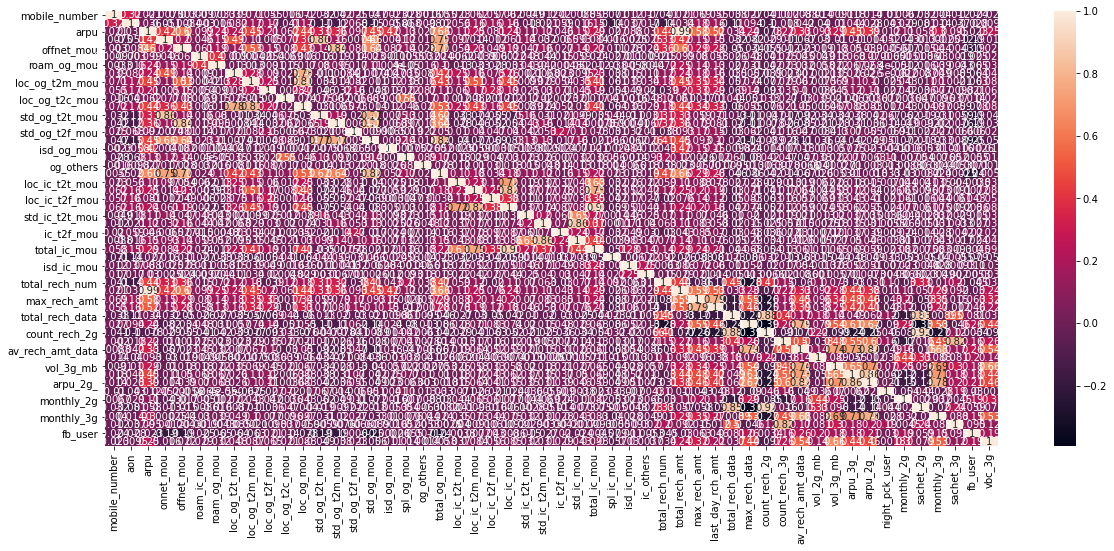

In [35]:
plt.figure(figsize= (20,8))
sns.heatmap (data_corr,annot = True)
plt.show()

In [36]:
a = pd.DataFrame(data_corr[data_corr>=0.8])
a

mobile_number  aon      arpu  onnet_mou  offnet_mou  \
mobile_number               1.0  NaN       NaN        NaN         NaN   
aon                         NaN  1.0       NaN        NaN         NaN   
arpu                        NaN  NaN  1.000000        NaN         NaN   
onnet_mou                   NaN  NaN       NaN   1.000000         NaN   
offnet_mou                  NaN  NaN       NaN        NaN    1.000000   
roam_ic_mou                 NaN  NaN       NaN        NaN         NaN   
roam_og_mou                 NaN  NaN       NaN        NaN         NaN   
loc_og_t2t_mou              NaN  NaN       NaN        NaN         NaN   
loc_og_t2m_mou              NaN  NaN       NaN        NaN         NaN   
loc_og_t2f_mou              NaN  NaN       NaN        NaN         NaN   
loc_og_t2c_mou              NaN  NaN       NaN        NaN         NaN   
loc_og_mou                  NaN  NaN       NaN        NaN         NaN   
std_og_t2t_mou              NaN  NaN       NaN   0.859919         NaN   
std_og_t2m_mou              NaN  NaN       NaN        NaN    0.838089   
std_og_t2f_mou              NaN  NaN       NaN        NaN         NaN   
std_og_mou                  NaN  NaN       NaN        NaN         NaN   
isd_og_mou                  NaN  NaN       NaN        NaN         NaN   
spl_og_mou                  NaN  NaN       NaN        NaN         NaN   
og_others                   NaN  NaN       NaN        NaN         NaN   
total_og_mou                NaN  NaN       NaN        NaN         NaN   
loc_ic_t2t_mou              NaN  NaN       NaN        NaN         NaN   
loc_ic_t2m_mou              NaN  NaN       NaN        NaN         NaN   
loc_ic_t2f_mou              NaN  NaN       NaN        NaN         NaN   
loc_ic_mou                  NaN  NaN       NaN        NaN         NaN   
std_ic_t2t_mou              NaN  NaN       NaN        NaN         NaN   
std_ic_t2m_mou              NaN  NaN       NaN        NaN         NaN   
ic_t2f_mou                  NaN  NaN       NaN        NaN         NaN   
std_ic_mou                  NaN  NaN       NaN        NaN         NaN   
total_ic_mou                NaN  NaN       NaN        NaN         NaN   
spl_ic_mou                  NaN  NaN       NaN        NaN         NaN   
isd_ic_mou                  NaN  NaN       NaN        NaN         NaN   
ic_others                   NaN  NaN       NaN        NaN         NaN   
total_rech_num              NaN  NaN       NaN        NaN         NaN   
total_rech_amt              NaN  NaN  0.990732        NaN         NaN   
max_rech_amt                NaN  NaN       NaN        NaN         NaN   
last_day_rch_amt            NaN  NaN       NaN        NaN         NaN   
total_rech_data             NaN  NaN       NaN        NaN         NaN   
max_rech_data               NaN  NaN       NaN        NaN         NaN   
count_rech_2g               NaN  NaN       NaN        NaN         NaN   
count_rech_3g               NaN  NaN       NaN        NaN         NaN   
av_rech_amt_data            NaN  NaN       NaN        NaN         NaN   
vol_2g_mb                   NaN  NaN       NaN        NaN         NaN   
vol_3g_mb                   NaN  NaN       NaN        NaN         NaN   
arpu_3g_                    NaN  NaN       NaN        NaN         NaN   
arpu_2g_                    NaN  NaN       NaN        NaN         NaN   
night_pck_user              NaN  NaN       NaN        NaN         NaN   
monthly_2g                  NaN  NaN       NaN        NaN         NaN   
sachet_2g                   NaN  NaN       NaN        NaN         NaN   
monthly_3g                  NaN  NaN       NaN        NaN         NaN   
sachet_3g                   NaN  NaN       NaN        NaN         NaN   
fb_user                     NaN  NaN       NaN        NaN         NaN   
vbc_3g                      NaN  NaN       NaN        NaN         NaN   

                  roam_ic_mou  roam_og_mou  loc_og_t2t_mou  loc_og_t2m_mou  \
mobile_number             NaN          NaN             NaN            

In [37]:
data_corr[(data_corr>0.8)].columns

Index(['mobile_number', 'aon', 'arpu', 'onnet_mou', 'offnet_mou',
       'roam_ic_mou', 'roam_og_mou', 'loc_og_t2t_mou', 'loc_og_t2m_mou',
       'loc_og_t2f_mou', 'loc_og_t2c_mou', 'loc_og_mou', 'std_og_t2t_mou',
       'std_og_t2m_mou', 'std_og_t2f_mou', 'std_og_mou', 'isd_og_mou',
       'spl_og_mou', 'og_others', 'total_og_mou', 'loc_ic_t2t_mou',
       'loc_ic_t2m_mou', 'loc_ic_t2f_mou', 'loc_ic_mou', 'std_ic_t2t_mou',
       'std_ic_t2m_mou', 'ic_t2f_mou', 'std_ic_mou', 'total_ic_mou',
       'spl_ic_mou', 'isd_ic_mou', 'ic_others', 'total_rech_num',
       'total_rech_amt', 'max_rech_amt', 'last_day_rch_amt', 'total_rech_data',
       'max_rech_data', 'count_rech_2g', 'count_rech_3g', 'av_rech_amt_data',
       'vol_2g_mb', 'vol_3g_mb', 'arpu_3g_', 'arpu_2g_', 'night_pck_user',
       'monthly_2g', 'sachet_2g', 'monthly_3g', 'sachet_3g', 'fb_user',
       'vbc_3g'],
      dtype='object')

<AxesSubplot:>

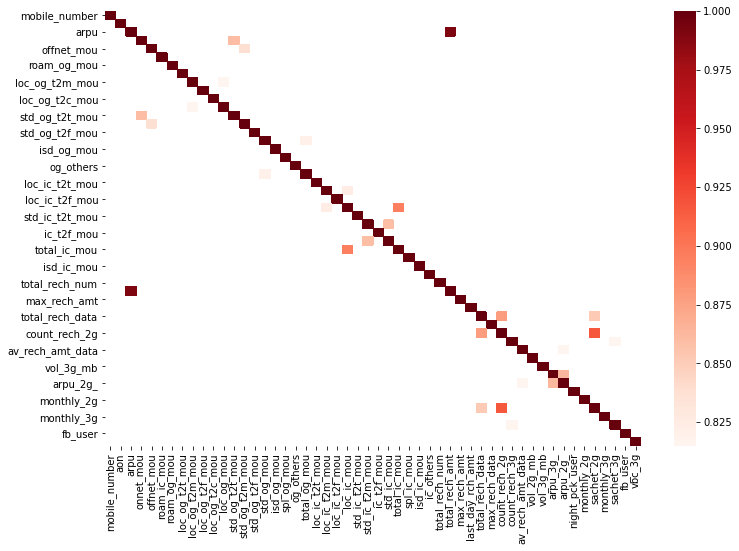

In [38]:
kot = data_corr[data_corr>=.8]
plt.figure(figsize=(12,8))
sns.heatmap(kot, cmap="Reds")

### DROPPING COLUMNS HAVING HIGH CORRELATION

In [39]:
data.drop(columns =['std_og_t2t_mou','std_og_t2m_mou','loc_og_mou','total_rech_amt','total_og_mou','loc_ic_mou','std_ic_mou',
                    'total_ic_mou','count_rech_2g','arpu_2g_','sachet_2g','sachet_3g'], inplace = True)


* We dropped columns that are having coreelation more than 0.8 because they share same features to the dataset

In [40]:
data.drop(columns =['mobile_number'], inplace = True)

In [41]:
data.head()

aon       arpu  onnet_mou  offnet_mou  roam_ic_mou  roam_og_mou  \
0   968  161.77600     0.0000      0.0000       0.0000       0.0000   
1  1006  185.93175    32.2025    118.5250       0.0000       0.0000   
2  1103  214.42200    44.7125    172.7975       9.6225      17.7350   
3  2491  342.49850   176.7475    104.3850      24.8100      16.7825   
4  1526  243.27800    85.6050     84.7275       0.0000       0.0000   

   loc_og_t2t_mou  loc_og_t2m_mou  loc_og_t2f_mou  loc_og_t2c_mou  ...  \
0          0.0000          0.0000          0.0000          0.0000  ...   
1         31.1150        108.2675          0.0000          0.7275  ...   
2         15.9750         28.2050         20.9375         45.4450  ...   
3         33.6475         69.6400          2.3825          0.0000  ...   
4         85.6050         80.4175          0.4825          0.0000  ...   

   count_rech_3g  av_rech_amt_data  vol_2g_mb  vol_3g_mb  arpu_3g_  \
0            1.0             252.0      9.300     85.985    212.17   
1            0.0             102.0    118.385      0.000      0.00   
2            0.0              46.0      0.000      2.105      2.84   
3            NaN               NaN      0.000      0.000       NaN   
4            0.0              56.0      0.000      0.000      0.00   

   night_pck_user  monthly_2g  monthly_3g  fb_user   vbc_3g  
0             0.0        0.00        0.75      1.0  33.7950  
1             0.0        0.25        0.00      1.0   0.0000  
2             0.0        0.00        0.00      1.0   1.0425  
3             NaN        0.00        0.00      NaN   0.0000  
4             0.0        0.00        0.00      0.0   0.0000  

[5 rows x 39 columns]

# Handling Missing Values | Null value imputation

In [42]:
prcnt_null_values_per_column=(pd.DataFrame(data.isnull().sum()/len(data)*100))
prcnt_null_values_per_column


0
aon                0.000000
arpu               0.000000
onnet_mou          1.018010
offnet_mou         1.018010
roam_ic_mou        1.018010
roam_og_mou        1.018010
loc_og_t2t_mou     1.018010
loc_og_t2m_mou     1.018010
loc_og_t2f_mou     1.018010
loc_og_t2c_mou     1.018010
std_og_t2f_mou     1.018010
std_og_mou         1.018010
isd_og_mou         1.018010
spl_og_mou         1.018010
og_others          1.018010
loc_ic_t2t_mou     1.018010
loc_ic_t2m_mou     1.018010
loc_ic_t2f_mou     1.018010
std_ic_t2t_mou     1.018010
std_ic_t2m_mou     1.018010
ic_t2f_mou         1.018010
spl_ic_mou         1.018010
isd_ic_mou         1.018010
ic_others          1.018010
total_rech_num     0.000000
max_rech_amt       0.000000
last_day_rch_amt   0.000000
total_rech_data   58.806588
max_rech_data     58.806588
count_rech_3g     58.806588
av_rech_amt_data  58.806588
vol_2g_mb          0.000000
vol_3g_mb          0.000000
arpu_3g_          58.806588
night_pck_user    58.806588
monthly_2g         0.000000
monthly_3g         0.000000
fb_user           58.806588
vbc_3g             0.000000

### MODE IMPUTATION ON COLUMNS fb_user & night_pck_user

In [43]:
data['fb_user'] = data['fb_user'].fillna(data['fb_user'].mode()[0])

In [44]:
data['night_pck_user'] = data['night_pck_user'].fillna(data['night_pck_user'].mode()[0])

In [45]:
data['fb_user'].isnull().sum()

0

In [46]:
data['night_pck_user'].isnull().sum()

0

* We did mode imputation because the values in this columns are 0 & 1

### MEDIAN IMPUTATION ON COLUMNS HAVING MORE OUTLIERS

In [47]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
IQR

aon                 1340.500000
arpu                 245.001375
onnet_mou            115.905000
offnet_mou           186.651667
roam_ic_mou            1.655000
roam_og_mou            3.165000
loc_og_t2t_mou        36.477500
loc_og_t2m_mou        91.592500
loc_og_t2f_mou         2.605000
loc_og_t2c_mou         1.007500
std_og_t2f_mou         0.000000
std_og_mou           185.690000
isd_og_mou             0.000000
spl_og_mou             4.710000
og_others              0.000000
loc_ic_t2t_mou        40.415000
loc_ic_t2m_mou       106.760000
loc_ic_t2f_mou         8.820000
std_ic_t2t_mou         5.935000
std_ic_t2m_mou        16.615000
ic_t2f_mou             0.652500
spl_ic_mou             0.077500
isd_ic_mou             0.200000
ic_others              0.212500
total_rech_num         5.500000
max_rech_amt          86.750000
last_day_rch_amt      59.250000
total_rech_data        1.666667
max_rech_data        145.250000
count_rech_3g          1.000000
av_rech_amt_data     158.666667
vol_2g_m

In [48]:
outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).sum()
outliers

aon                   121
arpu                 5787
onnet_mou           11583
offnet_mou           8395
roam_ic_mou         18201
roam_og_mou         18134
loc_og_t2t_mou      10375
loc_og_t2m_mou       8387
loc_og_t2f_mou      13227
loc_og_t2c_mou      13371
std_og_t2f_mou      23803
std_og_mou          11695
isd_og_mou          11472
spl_og_mou           9563
og_others           17592
loc_ic_t2t_mou       9240
loc_ic_t2m_mou       7163
loc_ic_t2f_mou      12675
std_ic_t2t_mou      13234
std_ic_t2m_mou      11104
ic_t2f_mou          16256
spl_ic_mou          12706
isd_ic_mou          22167
ic_others           16654
total_rech_num       5926
max_rech_amt         4373
last_day_rch_amt     4396
total_rech_data      3241
max_rech_data         557
count_rech_3g        1188
av_rech_amt_data     1576
vol_2g_mb           19828
vol_3g_mb           23836
arpu_3g_             3934
night_pck_user        978
monthly_2g          14048
monthly_3g          11680
fb_user              6053
vbc_3g      

In [49]:
outliers1 = outliers[outliers>10000]
print(list(outliers1.index))

['onnet_mou', 'roam_ic_mou', 'roam_og_mou', 'loc_og_t2t_mou', 'loc_og_t2f_mou', 'loc_og_t2c_mou', 'std_og_t2f_mou', 'std_og_mou', 'isd_og_mou', 'og_others', 'loc_ic_t2f_mou', 'std_ic_t2t_mou', 'std_ic_t2m_mou', 'ic_t2f_mou', 'spl_ic_mou', 'isd_ic_mou', 'ic_others', 'vol_2g_mb', 'vol_3g_mb', 'monthly_2g', 'monthly_3g', 'vbc_3g']


In [50]:
outlier_col = list(outliers1.index)
for i in outlier_col:
    data[i] = data[i].fillna(data[i].median())

In [51]:
data.head()

aon       arpu  onnet_mou  offnet_mou  roam_ic_mou  roam_og_mou  \
0   968  161.77600     0.0000      0.0000       0.0000       0.0000   
1  1006  185.93175    32.2025    118.5250       0.0000       0.0000   
2  1103  214.42200    44.7125    172.7975       9.6225      17.7350   
3  2491  342.49850   176.7475    104.3850      24.8100      16.7825   
4  1526  243.27800    85.6050     84.7275       0.0000       0.0000   

   loc_og_t2t_mou  loc_og_t2m_mou  loc_og_t2f_mou  loc_og_t2c_mou  ...  \
0          0.0000          0.0000          0.0000          0.0000  ...   
1         31.1150        108.2675          0.0000          0.7275  ...   
2         15.9750         28.2050         20.9375         45.4450  ...   
3         33.6475         69.6400          2.3825          0.0000  ...   
4         85.6050         80.4175          0.4825          0.0000  ...   

   count_rech_3g  av_rech_amt_data  vol_2g_mb  vol_3g_mb  arpu_3g_  \
0            1.0             252.0      9.300     85.985    212.17   
1            0.0             102.0    118.385      0.000      0.00   
2            0.0              46.0      0.000      2.105      2.84   
3            NaN               NaN      0.000      0.000       NaN   
4            0.0              56.0      0.000      0.000      0.00   

   night_pck_user  monthly_2g  monthly_3g  fb_user   vbc_3g  
0             0.0        0.00        0.75      1.0  33.7950  
1             0.0        0.25        0.00      1.0   0.0000  
2             0.0        0.00        0.00      1.0   1.0425  
3             0.0        0.00        0.00      1.0   0.0000  
4             0.0        0.00        0.00      0.0   0.0000  

[5 rows x 39 columns]

* We did oulier identification on our dataset and we find there are so many outliers present by calculating IQR, so we did median imputation on these columns having more than outliers greater than 10000

### MEAN IMPUTATION ON NUMERICAL COLUMNS

In [52]:
null_val_count = data.isnull().sum()
null_val_count

aon                     0
arpu                    0
onnet_mou               0
offnet_mou           1018
roam_ic_mou             0
roam_og_mou             0
loc_og_t2t_mou          0
loc_og_t2m_mou       1018
loc_og_t2f_mou          0
loc_og_t2c_mou          0
std_og_t2f_mou          0
std_og_mou              0
isd_og_mou              0
spl_og_mou           1018
og_others               0
loc_ic_t2t_mou       1018
loc_ic_t2m_mou       1018
loc_ic_t2f_mou          0
std_ic_t2t_mou          0
std_ic_t2m_mou          0
ic_t2f_mou              0
spl_ic_mou              0
isd_ic_mou              0
ic_others               0
total_rech_num          0
max_rech_amt            0
last_day_rch_amt        0
total_rech_data     58806
max_rech_data       58806
count_rech_3g       58806
av_rech_amt_data    58806
vol_2g_mb               0
vol_3g_mb               0
arpu_3g_            58806
night_pck_user          0
monthly_2g              0
monthly_3g              0
fb_user                 0
vbc_3g      

In [53]:
null_val_col = list(null_val_count.index)
for i in null_val_col:
    data[i] = data[i].fillna(data[i].mean())

In [54]:
prcnt_null_values_per_column=(pd.DataFrame(data.isnull().sum()/len(data)*100))
prcnt_null_values_per_column


0
aon               0.0
arpu              0.0
onnet_mou         0.0
offnet_mou        0.0
roam_ic_mou       0.0
roam_og_mou       0.0
loc_og_t2t_mou    0.0
loc_og_t2m_mou    0.0
loc_og_t2f_mou    0.0
loc_og_t2c_mou    0.0
std_og_t2f_mou    0.0
std_og_mou        0.0
isd_og_mou        0.0
spl_og_mou        0.0
og_others         0.0
loc_ic_t2t_mou    0.0
loc_ic_t2m_mou    0.0
loc_ic_t2f_mou    0.0
std_ic_t2t_mou    0.0
std_ic_t2m_mou    0.0
ic_t2f_mou        0.0
spl_ic_mou        0.0
isd_ic_mou        0.0
ic_others         0.0
total_rech_num    0.0
max_rech_amt      0.0
last_day_rch_amt  0.0
total_rech_data   0.0
max_rech_data     0.0
count_rech_3g     0.0
av_rech_amt_data  0.0
vol_2g_mb         0.0
vol_3g_mb         0.0
arpu_3g_          0.0
night_pck_user    0.0
monthly_2g        0.0
monthly_3g        0.0
fb_user           0.0
vbc_3g            0.0

In [55]:
52/2

26.0

* As there are so many null values in Discrete columns , so we did mean imputation on these columns. Now our data has no null values

### SCALE THE DATA

In [56]:
# Scaling the data to bring all the attributes to a comparable level 
data.iloc[:, :]

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
data = pd.DataFrame(sc.fit_transform(data.iloc[:, :]), columns = data.columns)
data.head()

aon      arpu  onnet_mou  offnet_mou  roam_ic_mou  roam_og_mou  \
0 -0.263797 -0.381481  -0.488363   -0.691522    -0.132668    -0.213946   
1 -0.223995 -0.300510  -0.368167   -0.270186    -0.132668    -0.213946   
2 -0.122396 -0.205008  -0.321473   -0.077257     0.033552     0.142158   
3  1.331420  0.224312   0.171348   -0.320451     0.295903     0.123033   
4  0.320662 -0.108281  -0.168842   -0.390330    -0.132668    -0.213946   

   loc_og_t2t_mou  loc_og_t2m_mou  loc_og_t2f_mou  loc_og_t2c_mou  ...  \
0       -0.334021       -0.633860       -0.296021       -0.276371  ...   
1       -0.101634        0.128685       -0.296021       -0.119300  ...   
2       -0.214710       -0.435207        1.419602        9.535430  ...   
3       -0.082720       -0.143374       -0.100798       -0.276371  ...   
4        0.305332       -0.067467       -0.256485       -0.276371  ...   

   count_rech_3g  av_rech_amt_data  vol_2g_mb  vol_3g_mb      arpu_3g_  \
0   6.791022e-01      7.901961e-01  -0.236527  -0.092158  1.194549e+00   
1  -8.115795e-01     -7.064939e-01   0.405204  -0.270312 -7.109924e-01   
2  -8.115795e-01     -1.265258e+00  -0.291237  -0.265951 -6.854858e-01   
3  -1.985987e-15      2.835899e-16  -0.291237  -0.270312 -5.871005e-15   
4  -8.115795e-01     -1.165479e+00  -0.291237  -0.270312 -7.109924e-01   

   night_pck_user  monthly_2g  monthly_3g   fb_user    vbc_3g  
0       -0.099382   -0.335034    2.123967  0.253832 -0.090002  
1       -0.099382    0.736584   -0.256969  0.253832 -0.282664  
2       -0.099382   -0.335034   -0.256969  0.253832 -0.276720  
3       -0.099382   -0.335034   -0.256969  0.253832 -0.282664  
4       -0.099382   -0.335034   -0.256969 -3.939615 -0.282664  

[5 rows x 39 columns]

# MODEL BUILDING

## UNSUPERVISED MACHINE LEARNING

### PRINCIPAL COMPONENT ANALYSIS(PCA)

In [59]:
# importing libraries : 
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

In [60]:
cov_mat = np.cov(data.T)
cov_mat

array([[ 1.00001000e+00,  3.60920266e-02, -4.92601152e-02, ...,
         1.36053198e-02,  4.67559550e-04,  9.45284733e-03],
       [ 3.60920266e-02,  1.00001000e+00,  4.21434905e-01, ...,
         2.97754732e-01, -7.67545430e-02,  2.51363118e-01],
       [-4.92601152e-02,  4.21434905e-01,  1.00001000e+00, ...,
        -2.52640098e-03, -1.30889305e-01, -1.61196229e-02],
       ...,
       [ 1.36053198e-02,  2.97754732e-01, -2.52640098e-03, ...,
         1.00001000e+00,  4.65232509e-02,  5.34390684e-01],
       [ 4.67559550e-04, -7.67545430e-02, -1.30889305e-01, ...,
         4.65232509e-02,  1.00001000e+00,  7.08155405e-02],
       [ 9.45284733e-03,  2.51363118e-01, -1.61196229e-02, ...,
         5.34390684e-01,  7.08155405e-02,  1.00001000e+00]])

In [61]:
eigenvalue, eigenvector = np.linalg.eig(cov_mat)

print(eigenvalue)
print(eigenvector)


[5.31143053e+00 3.54864685e+00 2.46725614e+00 1.72553022e+00
 1.64950192e+00 1.44637908e+00 4.71411366e-04 1.39998547e+00
 1.32029910e+00 1.29576747e+00 8.08060517e-02 1.06298411e-01
 1.22398763e+00 1.17845272e+00 1.93575496e-01 2.00718957e-01
 2.45145271e-01 3.21049447e-01 3.08976427e-01 1.05653420e+00
 1.05158168e+00 1.03716243e+00 1.01088059e+00 9.61070704e-01
 9.17429478e-01 8.80949713e-01 4.15478369e-01 4.32996293e-01
 4.62132635e-01 8.19016716e-01 7.84818857e-01 7.62128714e-01
 7.43273659e-01 7.16153271e-01 5.23221256e-01 5.38597057e-01
 6.46056457e-01 6.31003297e-01 5.85626013e-01]
[[-0.05154296  0.0110626  -0.28558514 ...  0.09201734 -0.06303522
   0.00511241]
 [-0.28348266  0.31574966  0.06296118 ...  0.01818264 -0.02433492
   0.04196306]
 [-0.07076252  0.31037286  0.19166747 ... -0.0550615   0.06237731
  -0.07042328]
 ...
 [-0.31895292 -0.15883765  0.10477507 ... -0.08674085 -0.14253027
   0.06143428]
 [-0.04995522 -0.1705628   0.00202032 ...  0.2292315   0.21844418
   0.0268

In [62]:
print(eigenvalue)

[5.31143053e+00 3.54864685e+00 2.46725614e+00 1.72553022e+00
 1.64950192e+00 1.44637908e+00 4.71411366e-04 1.39998547e+00
 1.32029910e+00 1.29576747e+00 8.08060517e-02 1.06298411e-01
 1.22398763e+00 1.17845272e+00 1.93575496e-01 2.00718957e-01
 2.45145271e-01 3.21049447e-01 3.08976427e-01 1.05653420e+00
 1.05158168e+00 1.03716243e+00 1.01088059e+00 9.61070704e-01
 9.17429478e-01 8.80949713e-01 4.15478369e-01 4.32996293e-01
 4.62132635e-01 8.19016716e-01 7.84818857e-01 7.62128714e-01
 7.43273659e-01 7.16153271e-01 5.23221256e-01 5.38597057e-01
 6.46056457e-01 6.31003297e-01 5.85626013e-01]


In [63]:
tot = sum(eigenvalue)

In [64]:
var_exp = [(i/tot)*100 for i in sorted(eigenvalue,reverse=True)]
var_exp

[13.6189164431636,
 9.099003506924976,
 6.326234523371889,
 4.424392222556713,
 4.229449805674439,
 3.708627224115811,
 3.589670439567305,
 3.385348463693659,
 3.322447476379789,
 3.138398445493277,
 3.0216434275702824,
 2.709034951060681,
 2.6963363287948297,
 2.6593642564387068,
 2.5919755923366963,
 2.464259212699078,
 2.3523597538711725,
 2.258822829378465,
 2.1000218607869106,
 2.012335918880665,
 1.9541566476063064,
 1.9058108352274485,
 1.8362720742890317,
 1.6565384512618087,
 1.6179409915860525,
 1.5015901460097716,
 1.3810042842756636,
 1.3415795469396827,
 1.1849436244535783,
 1.110235803532231,
 1.0653184981312382,
 0.8231954783833675,
 0.7922393263082566,
 0.6285713313982983,
 0.5146588453574504,
 0.49634246314162417,
 0.27255730195276234,
 0.20719293238194242,
 0.001208735004504388]

In [65]:
np.cumsum(var_exp)

array([ 13.61891644,  22.71791995,  29.04415447,  33.4685467 ,
        37.6979965 ,  41.40662373,  44.99629417,  48.38164263,
        51.70409011,  54.84248855,  57.86413198,  60.57316693,
        63.26950326,  65.92886751,  68.52084311,  70.98510232,
        73.33746207,  75.5962849 ,  77.69630676,  79.70864268,
        81.66279933,  83.56861017,  85.40488224,  87.06142069,
        88.67936168,  90.18095183,  91.56195611,  92.90353566,
        94.08847928,  95.19871509,  96.26403359,  97.08722906,
        97.87946839,  98.50803972,  99.02269857,  99.51904103,
        99.79159833,  99.99879126, 100.        ])

In [66]:
(eigenvalue >= 1).sum()  # kaiser criterion  to find principal component.


15

In [67]:
pca = PCA(n_components = 15 ) 

data_principal = pca.fit_transform(data) 

data_principal = pd.DataFrame(data_principal) 

data_principal.columns = ['P1','P2','P3','P4','P5','P6','P7','P8','P9','P10','P11','P12','P13','P14','P15']

print(data_principal.head())


         P1        P2        P3        P4        P5        P6        P7  \
0  2.098339 -2.299263 -0.463003  1.503152 -0.883128  0.327263 -1.069462   
1 -1.350486 -0.060187 -0.607328 -0.049869  1.179531 -0.184599 -0.149717   
2 -0.659474  2.711899  0.914242 -3.384240  3.619096  9.989608 -4.250728   
3 -0.386218  0.387372  0.433767 -0.442109 -0.286249  0.463313 -0.063696   
4 -1.734094  0.989313 -1.167534  0.486346 -0.225799 -0.705352 -0.868532   

         P8        P9       P10       P11       P12       P13       P14  \
0 -0.125831  0.494339  0.049277  0.452844  0.029800 -0.072619 -0.214737   
1  0.093187  0.188125  0.123379 -0.257278  0.179407 -0.157782  0.229859   
2  2.171459 -1.121988  0.365145  0.619280  1.306908 -1.648221  0.012105   
3  0.093385 -0.386302  0.070887 -0.211507  0.560076  0.368428 -0.580560   
4  0.050808 -0.126396  0.391667  0.217843 -2.087733 -2.093470 -0.430965   

        P15  
0 -0.079035  
1 -0.139323  
2 -0.205978  
3  0.121243  
4  1.318243  


* We chose the principal componenets are 15 by finding princial components through Kaiser criterion.
* We get Kaiser criterion by cov matrix, eigen value and eigen vector.


### DBSCAN

In [69]:
neighbors = NearestNeighbors(n_neighbors=30)
neighbors_fit = neighbors.fit(data_principal)
distances, indices = neighbors_fit.kneighbors(data_principal)

# we took n_neighbors = 30 because n_components are 15 so it is 15*2

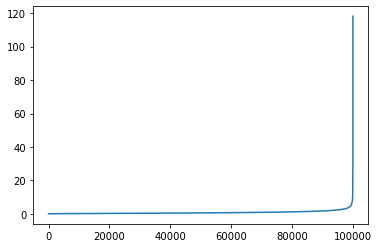

In [70]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

* For finding optimal valve for epsilon we plot k-distance elbow plotand found the maximum curvature point. The ideal value for ε will be equal to the distance value at the “crook of the elbow”.
* We found that this point is in between 0 and 20
* We selected Min_samples = 30(twice the dimension)

In [71]:
db_default = DBSCAN(eps = 2.5, min_samples = 30).fit(data_principal)
labels = db_default.labels_

# for min_sample it is 2* dimension that s 2*38 = 78

In [72]:
np.unique(labels)

array([-1,  0,  1], dtype=int64)

* From DBSCAN 2 clusters are formed 0 and 1 and -1 is the oulier
* O indicates the people who didn't churn.
* 1 indicates the people who are likely to churn

In [73]:
# Building the label to colour mapping 

colours = {} 

colours[0] = 'r'
        
colours[1] = 'g'

colours[2] = 'b'

colours[3] = 'c'

colours[-1] = 'k'

In [74]:
# Building the colour vector for each data point 
cvec = [colours[label] for label in labels]

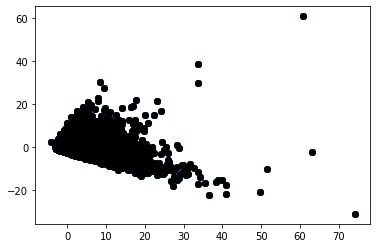

In [75]:
# For the construction of the legend of the plot 
r = plt.scatter(data_principal['P1'], data_principal['P2'],
                color ='r'); 

g = plt.scatter(data_principal['P1'], data_principal['P2'], 
                color ='g');  

b = plt.scatter(data_principal['P1'], data_principal['P2'], 
                color ='b');  
  
c = plt.scatter(data_principal['P1'], data_principal['P2'], 
                color ='c');  

k = plt.scatter(data_principal['P1'], data_principal['P2'], 
               color ='k');  

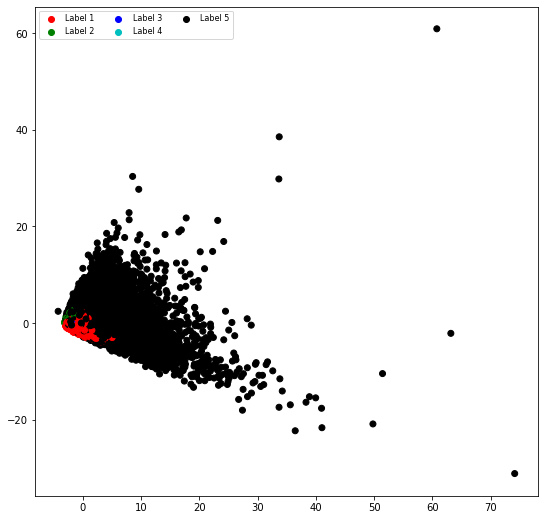

In [116]:
# Forming scatterplot to show the clusters

plt.figure(figsize =(9, 9)) 

plt.scatter(data_principal['P1'], data_principal['P2'], c = cvec)
plt.legend((r, g, b, c, k), ('Label 1', 'Label 2', 'Label 3', 'Label 4', 'Label 5'), 
           scatterpoints = 1, loc ='upper left', ncol = 3, fontsize = 8) 
plt.show() 

* From the above plots we can only observe one clusters rest all clusters are either hidden by the outliers or so small to be visualized
* The biggest cluster 0 is only seen(red color) along with the outliers

In [76]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters_

2

In [82]:
data_principal1= data_principal.copy()

In [83]:
data_principal1 

P1        P2        P3        P4        P5        P6        P7  \
0      2.098196 -2.299341 -0.461811  1.506349 -0.870568  0.341039 -1.064279   
1     -1.350542 -0.060275 -0.606695 -0.051122  1.177941 -0.185857 -0.153680   
2     -0.659361  2.711558  0.911488 -3.369081  3.607586  9.995093 -4.200957   
3     -0.386274  0.386898  0.433366 -0.446996 -0.292666  0.442397 -0.093482   
4     -1.734193  0.989517 -1.167040  0.488326 -0.208684 -0.689387 -0.877801   
...         ...       ...       ...       ...       ...       ...       ...   
99994 -1.068083 -1.332671 -0.944013 -0.389020 -0.636792  0.071075 -0.268452   
99995 -0.739228 -1.002679 -0.778326  0.018869 -0.630056  0.079038 -0.153470   
99996 -1.968229 -0.396607 -0.224330 -1.036632  0.081920  0.497835 -0.571761   
99997  9.863673 -6.135216  3.315229  0.100242 -0.826430 -0.741796 -0.496450   
99998 -0.300153  0.027240 -2.204554 -0.372638  0.490777  0.599656  0.952896   

             P8        P9       P10       P11       P12       P13       P14  \
0     -0.157505  0.518188  0.033560  0.456814  0.081723 -0.032345 -0.229909   
1      0.076963  0.185585  0.113492 -0.254915  0.215679 -0.124981  0.235098   
2      2.206153 -1.073106  0.383426  0.600904  1.721266 -1.185538  0.037018   
3      0.071097 -0.429951  0.059467 -0.192038  0.539961  0.555542 -0.455244   
4      0.061291 -0.118956  0.422955  0.175277 -1.281966 -2.490472 -0.793442   
...         ...       ...       ...       ...       ...       ...       ...   
99994  0.432627 -0.035706  0.060618  0.241230  0.086349  0.127486 -0.508412   
99995  0.274094  0.192864 -0.126202  0.388566  0.033477  0.097835 -0.232104   
99996  0.374221 -0.111728  0.561389 -0.663429  0.421944 -0.063170  0.295144   
99997 -0.155246 -0.093975 -0.140822 -0.182963 -1.134827 -1.490548 -0.425680   
99998 -2.623391 -0.868098  3.659339  0.562570 -0.686526  0.594334  0.197818   

            P15  
0     -0.030761  
1     -0.143898  
2     -0.337005  
3      0.114657  
4      1.407173  
...         ...  
99994 -0.949955  
99995 -0.556702  
99996  0.785965  
99997  0.718204  
99998 -0.363410  

[99999 rows x 15 columns]

In [84]:
data_principal1 ['label'] = db_default.labels_

In [89]:
data_principal1.drop(['label'], axis = 1, inplace = True )

In [92]:
data_principal1['cluster']= db_default.labels_
data_principal1 ['cluster'].value_counts()

 0    92116
-1     7398
 1      485
Name: cluster, dtype: int64

* From the valuecounts it is clear that the count for -1 is 7398  and it is an outlier as we can iiinfer from dataset.
* Clearly the cluster 0 gives the customers who are not likely to churn
* But the high values of outliers raise a concern 
* Therefore we raise the value of epsilon to 1.5 but no much change was observed therefore we choosed epsilon value as 2.5

In [93]:
data_principal1.head()

P1        P2        P3        P4        P5        P6        P7  \
0  2.098196 -2.299341 -0.461811  1.506349 -0.870568  0.341039 -1.064279   
1 -1.350542 -0.060275 -0.606695 -0.051122  1.177941 -0.185857 -0.153680   
2 -0.659361  2.711558  0.911488 -3.369081  3.607586  9.995093 -4.200957   
3 -0.386274  0.386898  0.433366 -0.446996 -0.292666  0.442397 -0.093482   
4 -1.734193  0.989517 -1.167040  0.488326 -0.208684 -0.689387 -0.877801   

         P8        P9       P10       P11       P12       P13       P14  \
0 -0.157505  0.518188  0.033560  0.456814  0.081723 -0.032345 -0.229909   
1  0.076963  0.185585  0.113492 -0.254915  0.215679 -0.124981  0.235098   
2  2.206153 -1.073106  0.383426  0.600904  1.721266 -1.185538  0.037018   
3  0.071097 -0.429951  0.059467 -0.192038  0.539961  0.555542 -0.455244   
4  0.061291 -0.118956  0.422955  0.175277 -1.281966 -2.490472 -0.793442   

        P15  cluster  
0 -0.030761        0  
1 -0.143898        0  
2 -0.337005       -1  
3  0.114657        0  
4  1.407173        0

In [94]:
data_principal1.shape

(99999, 16)

In [96]:
col = data_principal1[data_principal1['cluster'] == -1]

In [98]:
data_principal1.drop(data_principal1.index[data_principal1['cluster'] == -1],inplace = True)

In [99]:
data_principal1.shape

(92601, 16)

In [100]:
data_principal1 ['cluster'].value_counts()

0    92116
1      485
Name: cluster, dtype: int64

* We drop the outliers and made the dataset formed of two clusters 0 and 1.

#### INFERENCE
* After doing data understanding the data and completing the basic EDA we choose to do clustering using DBSCAN. The dataset is large, so we did dimension reduction using PCA and we choose 15 components.
* Further, we proceeded doing DBSCAN and found that three clusters were formed – -1, 0, 1. Of this cluster -1 represents the outliers, so we removed the rows that are labelled as -1. 
* Cluster 0 is large in numbers therefore, this cluster represents the people who are not likely to be churned. Then, it is obvious that cluster 1 is the representation of the customers who are likely to be churned.

# INFERENCES FROM CLUSTERING


* By clustering we found that even though there is a large proportion of customers who would continue to use the 
services, the customers who decided to churn cannot be neglected. This number forces us to look in to the problems 
that is leading customers to leave the current telecom service provider and the possible strategies that must be 
adopted to prevent the customers to churn. 

* This is important since customer churn in the telecom industry poses one of the most significant risks to loss of 
revenue. The average churn rate in the telecom industry is approximately 1.9% per month across the four major 
carriers, but could rise as high as 67% annually for prepaid services*. Since the cost of acquiring new customers is up 
to 25 times higher than the cost of retaining them, fostering customer loyalty is key.

* With low switching costs and an abundance of alternative providers, customer satisfaction is the most effective means 
of reducing customer churn in telecom. And the most effective means of improving the customer experience is fully 
taking advantage of the vast streams of rich telecom customer data.



# POSSIBLE REASON FOR TELECOM CUSTOMER CHURN 


Four key factors lead customers to leave one telecommunications provider. To avoid customer churn in the telecom 
industry, companies should address the below factors.
* Service quality: 
If a network quality issue causes the churn, telco managers could identify the exact cause of 
the issue effectively. For example, the main reasons for bad service could be a damaged cell phone, poor 
reception, or communication tower issues. To accurately track this driver, telecom companies should keep 
an eye on and manage their dropped-call rate as well as their call completion rate.
* Features and content availability: 
It occurs in marketing or sales when a customer signs up for a plan that 
isn’t best suited to their needs. Unfortunately, such a decision most often ends up in terminating the 
contract. Therefore, it’s crucial to measure your customer churn rate for specific services or bundles to 
identify an acquisition problem.
* Lower cost substitutes from competitors: 
Telco’s are always in a state of instability where even the slightest 
change, such as pricing changes or new product launches, can cause customers to try another service 
provider. In addition, from the awarding of new telco licenses introducing new competitors to higher taxes 
borne by the consumer, these factors also contribute to customer churn in the telecom sector.
* Negative customer service experiences: 
Customer service has always affected customer satisfaction, 
regardless of industry. This is even more visible in the telecom industry, where communication services are a 
necessity. From issues reaching the call centres to the actual resolution of the customer’s problems, keeping 
your customer service issues to a minimum is the key.

# STRATEGIES FOR REDUCING CHURN RATE IN TELECOM INDUSTRY

Some proactive, data-driven strategies for determining how to reduce customer churn rates in telecom include 
network optimization, customer complaint analytics, and CLV management. Read on to see how these strategies can 
help reduce your customer churn rate.

* Network Optimization
A key factor impacting the churn rate in the telecom industry is network reliability. One of the most common issues 
reported by customers is a slow, down, or spotty network connection. Despite a massive increase in network data 
and usage, customers still expect reliability and lightning speeds.
Continuous telecom network traffic monitoring and measuring telecom network performance are essential, 
proactive measures that help telecom network analysts identify sources that affect network bandwidth and latency, 
such as poor infrastructure, poor security, incompatible or badly designed applications, and inadequate hardware.
Accelerated network infrastructure monitoring tools enable telecom network analysts to instantly query and 
visualize billions of interactions and continuous flows of sensor data packets across entire telecommunications 
networks. With this data, analysts can rapidly discover actionable intelligence concerning network performance, 
signal strength, and download speeds, whereby they can optimize the network infrastructure and improve the 
overall quality of the telecom customer experience.
Edge networking, a solution employed in 5G optimization, functions to conserve network resources by offloading 
network traffic, thereby reducing the strain on data centers, and reducing network latency and bottlenecks that 
would affect customer retention.

* Managing Customer Lifetime Value
An effective strategy for reducing customer churn rates in telecom is anticipating future issues with predictive 
modelling. Applying churn rate predictive modelling to individual customers’ transaction data aggregated from data 
warehouses helps telecom providers predict how much value a telecom customer may add throughout their 
lifecycle, who is at most risk of leaving, and which customers to prioritize.
Churn prediction models examine current and historical datasets for underlying patterns and calculate the 
probability of an outcome. Advanced algorithms can identify previously hidden variables and combinations of 
variables related to telecom customer behaviour that correlates with customer churn. Providers can then use this 
information on an accelerated analytics platform, where they can rapidly process and visualize entire customer 
datasets, identify and better understand trends in their customers’ behaviour, and ultimately increase the 
percentage of subscribers who remain happy and loyal.
Churn rate prediction models also give providers insight into how much money each telecom customer is spending 
on a service, how often they are using a service, and when. These enormous streams of data regarding customer 
accounts, connectivity, demographics, usage, and geographies help telecom companies create micro-segmentations 
of customers, in which providers can develop a more targeted, personalized understanding of telecom customer 
behaviour, such as insight into when customers are using more or less of a service, when to offer a more enticing 
package, which services to offer in the package, and how much their monthly bill should be.

* Customer Complaint Analytics
The leading cause for customer churn in telecom is poor customer service experiences. Long wait times, ineffective 
self-service options, incompetent service agents, unresolved issues, and convoluted billing all contribute to customer 
dissatisfaction.
Frustrated customers share negative sentiments regarding customer service experiences with friends and family, but 
also across social media channels, online forums, and even with the media. While this may sound negative, telecom 
customer complaints are in fact a valuable, strategic source of insight. An effective customer complaint management 
program includes complaint intake, complaint categorization, complaint routing and resolution, communication and 
tracking, and reporting.
A combination of automated text mining tools, Natural Language Processing techniques, advanced customer
analytics, and text mining algorithms can be used to apply sentiment analysis to public text, which structures input 
text, identifies patterns within the structured data, and interprets the results. This is useful in gauging public opinion 
regarding telecom services, which helps providers flag service issues that may lead to increased customer churn rate.
Advanced data science platforms provide exploratory data science dashboards and modelling capabilities that 
enable telecom analysts to access interactive spatiotemporal visualizations and deep behavioural analytics. These 
can identify and track telecom customer behaviour patterns and sentiments, establish relationships, identify trends, 
sort and categorize textual datasets, and isolate and analyse only the most useful information regarding customer 
complaints.


Adopting these strategies can help one to reduce churn to a great extent.

# CONCLUSION

In this project, we have evaluated the dataset based on telecom customer churn. We analyse the data and divide the
customers who are likely to be churned and not likely to be churned. 
We have also listed the possible reasons for customer churn and suggested some of the strategies that can be 
adopted to avoid customer churn